# Weather Forescast

This project describes the step-by-step method for forecasting the mean temperature of Spain through the application of various predictive methods.

The project is structured into four distinct sections:

- Introduction: This section provides essential insights into time series and prediction concepts.

- Data collection and preprocessing: This section describes the steps for data preprocessing, which are essential to ensure that the data is ready for prediction algorithms.

- Prediction models: This section specifies a step-by-step process for developing a prediction model, including training, forecasting future data, and evaluation. The study explores four distinct prediction models: ARIMA, SARIMA, SARIMAX, and PROPHET.

- Conclusion: A comparative analysis of the results obtained from the various prediction methods is presented in this concluding section.

<a name="top"></a>
 
## Table of Contents 
* [1. Introduction](#item0)
    * [1.1. Time Series Basics](#item1.1)
    * [1.2. Stationarity in Time Series](#item1.2)
    * [1.3. Time series decomposition](#item1.3)
    * [1.4. Steps to forecasting](#item1.4)
    * [1.5. Types of Predictive Models](#item1.5)
        * [1.5.1. ARIMA model](#item1.5.1)
        * [1.5.2. SARIMA model](#item1.5.2)
        * [1.5.3. SARIMAX model](#item1.5.3)
        * [1.5.4. PROPHET model](#item1.5.4)
            
            
* [2. Project objectives](#item2)


* [3. Data collection and preprocessing](#item3)


* [4. Data preprocessing](#item4)
    * [4.1. Setting Date Column as Time Series Index](#item4.1)
    * [4.2. Chronological Arrangement of Time](#item4.2)
    * [4.3. Frequency of the time series](#item4.3)
    * [4.4. Stationary time series](#item4.4)
        * [4.4.1. Augmented Dickey–Fuller test](#item4.4.1)
        * [4.4.2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS Test)](#item4.4.2)
        * [4.4.3. Graph the Data Series](#item4.4.3)
        * [4.4.4. Time series decomposition](#item4.4.4)
        * [4.4.5. Autocorrelation in Time Series Data](#item4.4.5)
        * [4.4.6. Partial Autocorrelation in Time Series Data](#item4.4.6)
        
        
* [5. Prediction models](#item5)
    * [5.1. ARIMA model](#item5.1)
        * [5.1.1. Train-Test Data Split](#item5.1.1)
        * [5.1.2.  Select Model Parameters with Auto_ARIMA.](#item5.1.2)
        * [5.1.3. ARIMA Model Creation](#item5.1.3)
        * [5.1.4. Analysis of the prediction residual](#item5.1.4)
            * [5.1.4.1. Histogram and Density](#item5.1.4.1)
            * [5.1.4.2. Residuals graph ](#item5.1.4.2)
            * [5.1.4.3. Autocorrelation Function ](#item5.1.4.3)
            * [5.1.4.4. Analyzing the decomposition of residuals](#item5.1.4.4)
        * [5.1.5. Prediction](#item5.1.5)
        * [5.1.6. Model Metric](#item5.1.6)
    * [5.2. Sarima model](#item5.2)
        * [5.2.1. Frequency of the time series](#item5.2.1)
        * [5.2.2. Chronological Arrangement of Time](#item5.2.2)
        * [5.2.3. Train-Test Data Split](#item5.2.3)
        * [5.2.4. Auto_ARIMA Parameter Selection](#item5.2.4)
        * [5.2.5. SARIMA Model Creation, Forecasting, Validation and Evaluating](#item5.2.5)
    * [5.3. Sarimax model](#item5.3)
        * [5.3.1. Including Exogenous Variables in the Train Set](#item5.3.1)
        * [5.3.2. Select Model Parameters with Auto_ARIMA](#item5.3.2)
        * [5.3.3. SARIMAX Model Creation](#item5.3.3)
    * [5.4. Prophet model](#item5.4)
    
    
* [6. Conclusion](#item6)

<a name="item0"></a>
## 1. Introduction

<a name="item1.1"></a>
### 1.1. Time Series Basics

**Time series.** A time series is a series of data points that are arranged in chronological order. In a time series, time is often the independent variable. 

**Time series analysis.** The analysis of time series enables us to comprehend the patterns or trends of specific data over time. 

**Time series forecasting.** Time series forecasting involves predicting future values over a certain period by analyzing past data. This method relies on developing models based on previous data and applying them to make observations that can guide future strategic decisions. 

<a name="item1.2"></a>
### 1.2. Stationarity in Time Series

**Stationary time series.** Meaning that the statistical properties of the data point do not change over time. That is, a time series is stationary when its statistical properties are independent of time. These are the following properties that any stationary model will have:

- Constant mean
- Constant variance (there may be variations, but the variations should not be irregular)
- Constant covariance
- No seasonality (no repetitive patterns in the dataset)

**Why is it important for a time series to be stationary?** Some time series forecasting models (e.g., autoregressive models) require a stationary time series. Stationary time series have constant statistical properties, making them easier to model.

**Techniques for evaluating stationarity.** There are different methods to analyze stationarity of a time series, such as the ADF test and KPSS test.

- *Augmented Dickey–Fuller test (ADF Test)*  is a common statistical test used to test whether a given Time series is stationary or not. The ADF test is unit root test. This test has two hypothesis: Null Hypothesis or Alternative Hypothesis. The alternative is selected by a value named p values.

     - Null Hypothesis (H0): The null hypothesis of the ADF test posits the presence of a unit root, indicating non-stationarity in the time series.
                
                p-value  > 0.05 (significance level)

     - Alternative Hypothesis (H1): The alternative hypothesis suggests the absence of a unit root, indicating difference-stationary in the time series. 
                
                p-value  < 0.05 (significance level)
                
- *Kwiatkowski-Phillips-Schmidt-Shin (KPSS Test)*: the KPSS test examines whether a time series is trend-stationary around a deterministic trend. In this test you have to pay attention to the values: p-value, Test Statistic and Critical Values. These values will be used to determine the stationarity of the series.

     - Null Hypothesis (H0): The null hypothesis of the KPSS test assumes that the time series is stationary around a deterministic trend, which is called trend-stationary.
        
                p-value > 0.05
                Test Statistic < Critical Values

     - Alternative Hypothesis (H1): The alternative hypothesis suggests that the time series has a unit root and is non-stationary.
        
**When to choose the ADF or KPSS test?** It can be confusing to determine whether to use ADF or KPSS test. However, it is recommended to use both the ADF and KPSS test to ensure that the series is strictly stationary.


**How do we interpret the results of the KPSS test and ADF test?**

- Strictly stationary: Both tests conclude that the series is not stationary.

- Both tests conclude that the series is stationary.

- Trend-stationary: KPSS test conclude that the series is stationary, and ADF test conclude that the series is non-stationary. In this case, you have to remove the trend to make the series strictly stationary.

- Difference-stationary: ADF test conclude that the series is stationary, and KPSS test conclude that the series is non-stationary. In this case, you have to remove the trend to make the series strictly stationary. In order to achieve stationarity, differentiation of the time series is necessary.

**How to convert a series to stationary?** Transformations such as logarithms can help to stabilise the variance of a time series. The differentiation is the way to convert a non-stationary series into a stationary series. It could be an ordinary differentiation and/or a seasonal difference.
    
- *Seasonal differencing* is defined as a difference between a value and a value with lag that is a multiple of S. With S = 12 (S is seasonal of the data set), which may occur with monthly data, a seasonal difference is. This differencing ekiminate ot reduce seasonality.

        
- *Ordinary differencing* is need when there is a trend in the data. This differencing ekiminate ot reduce trend.

<a name="item1.3."></a>
### 1.3. Time series decomposition

Time series decomposition is a valuable technique that involves breaking down a time series dataset into three essential components:

- The trend component captures the long-term movement or underlying pattern in the data. 

- Seasonality represents the short-term fluctuations that repeat at regular intervals, often influenced by factors like seasons or cycles.

- The residual component, also known as noise, accounts for random variability that remains after removing the trend and seasonality. 

This decomposition aids in understanding the distinct elements contributing to the overall behavior of the time series, facilitating better modeling and analysis.

<a name="item1.4."></a>
### 1.4. Steps to forecasting 

The process of forecasting can be divided into two stages: data preprocessing and the development of a forecasting model.

#### First stage: Data preprocessing

Data preprocessing is an important step in the data mining process. It refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis and forescasting. In this section, you need to perform the following steps:

**1. Set date column as time series index**: Configure the date column as the time series index.


**2. The date must be a datetime**
 
 
**3. Chronological arrangement of aime**: Arrange the data chronologically for making a time-based analysis.


**4. Frequency of the time series**: Set the frequency of date intervals in the series.


**5. Analyze the stationary of time series**: Some models need the stationary time series. In order to analyze the stationary of a series, you need to follow these steps:

   - *ADF and KPSS test*: This are methods to analyze stationarity of a time series.


   - *Graph the time series*: This visualization can help identify any trends or patterns in the data set.
     
     
   - *Time series decomposition*: Decompose time series into trend, seasonality, and residuals.


   - *Autocorrelation function (ACF) in time series*: The ACF is a way to measure the linear relationship between an observation at time t and the observations at previous times. 


   - *Partial autocorrelation function (PACF) in time series*: The partial autocorrelation function captures the correlation between the series and its lag, excluding contributions from intermediate lags. In the context of time series analysis, a "lag" refers to the time difference between two observations in a time series. 

#### Second stage: Forecasting model development 

**1. Train-Test Data Split**: The Train-Test Split technique involves dividing a dataset into two subsets:

 - *Training Set*: The larger portion is used to train the predictive model. Typically, 70-80% of the data is used for testing.

 - *Testing Set*: The smaller portion is used to evaluate the model's performance. Typically, 20-30% of the data is used for testing.

This model validation process allows you to simulate how your model would perform with new data. 


**2. Auto_ARIMA Parameter Selection**: When using ARIMA models for predictions, the `auto_arima` function can identify the optimal model parameters. This function is associated with the `pmdarima` library, a Python library for the ARIMA model.


**3. Model Creation**: Create the model with the selected parameters.

**4. Analysis of the prediction residual**: The 'residual' in a time series model is the remainder after the model has been fitted. It is used to see if the model has successfully captured all the information in the data. Residuals represent the unexplained variance that the model couldn't capture. Analyzing residuals is essential to evaluate the predictive performance of the model. A good forecasting method will yield residuals with the following properties:

 - *Normal Gaussian pattern in histogram:* The histogram of residuals should show a normal Gaussian pattern with a centered peak. The width of the histogram provides insights into the dispersion of residual values. It illustrates the frequency of various residual values in the data series.
 

 - *Normal Gaussian density:* The density of residuals should follow a normal Gaussian distribution. Density represents the probability distribution of continuous variable values. The mode, where the curve reaches its maximum value, aligns with the mean and median in a normal distribution.


 - *Residuals similar to white noise:* The graph of residuals should resemble white noise, which is a random signal with constant intensity across all frequencies. Residuals behaving like white noise indicate randomness and a lack of systematic patterns.


 - *Uncorrelated residuals:* Residuals should exhibit no correlations with each other. Autocorrelation Function (ACF) values for residuals should be low. Low ACF values imply that residuals lack predictive nature and are independent over time.


 - *Zero mean of residuals:* Residuals should have a mean close to zero. 


 - *Analyzing the decomposition of residuals:* Decomposition allows you to identify any remaining patterns or structures in the residuals. A good forecasting model should leave residuals that are uncorrelated, have constant variance, and follow a normal distribution. Analyzing the decomposition of residuals helps in assessing whether the model meets these assumptions.


Evaluating residuals against these criteria helps ensure the reliability and adequacy of a time series forecasting model.



**5. Prediction**: Make predictions using the trained model.


**6. Model Metric**: Evaluation metrics explain the performance of the model. The main metric that I am going to analyze is coefficient of determination, or R-squared.

 - *R-squared* is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable. That is, this is a measure that provides information about the goodness of fit of a model. It can range from 0 to 1. 
 
 A perfect R-squared of 1.00 means that our predictor variables (in this case, it is Mean Temperature) explain 100% of the variance in the outcome we are trying to predict. In other words, an R-squared of 1.00 means that we can use the predictor variables to know precisely what the outcome’s value will be with no room for error. 

In the context of a prediction model, "variance" generally refers to the variability or spread of values for a variable. Higher variance means that values are more spread out, while lower variance indicates that values tend to be closer to the mean.

- Dependent Variable (or Response): This is the variable you are trying to predict. In this case, it would be the future temperature.

- Independent Variable (or Predictor): This is the variable you are using to make the prediction. In this case, it is the past values of temperature that are used to predict the future temperature.

<a name="item1.5."></a>
### 1.5. Types of Predictive Models

<a name="item1.5.1"></a>
#### 1.5.1. ARIMA model

ARIMA, short for autoregressive integrated moving average, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

Arima term can be divided into three terms, AR(p), I(d), MA(q).

It is a model that does not consider seasonality, it only takes into account the trend. The parameter 'd' is the one that analyzes how many differentiations must be made for the series to be stationary.

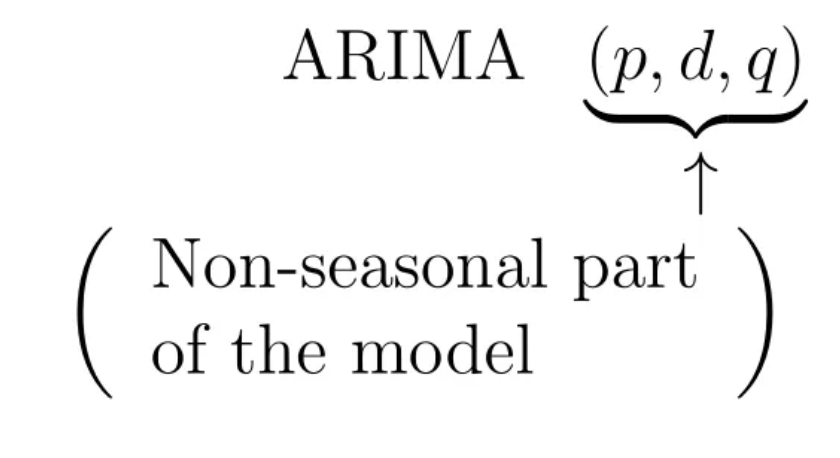

- **AR(p):** 

AR stands for the autoregressive model. It is a statistical model that predicts future values based on past values.  In this way, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.
    
The order, p, of the autoregressive model can be determined by looking at the partial autocorrelation function (PACF). The PACF gives the partial correlation of a time series with its own lagged values


- **MA(q):** 

MA stands for the moving average model. It is similar to an Autoregressive model, except that instead of being a linear combination of past time series values, it is a linear combination of the past white noise terms. This means that the MA model sees such random white noise "shocks" directly at each current value of the model.  
    
The order of the MA component, denoted by q, represents the number of lagged forecast errors used in the model.The order of the moving average model, q, can usually be estimated by looking at the ACF plot of the time series.

- **I(d):** 

I is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary. 
    
The way to convert a non-stationary series into a stationary series is through ordinary differentiation and/or through seasonal differences.
    
Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.
    
The differentiation is the way to convert a non-stationary series into a stationary series. It could be an ordinary differentiation and/or a seasonal difference.
    
- *Seasonal differencing* is defined as a difference between a value and a value with lag that is a multiple of S. With S = 12 (S is seasonal of the data set), which may occur with monthly data, a seasonal difference is.
        
- *Ordinary differencing* is need when there is a trend in the data.

<a name="item1.5.2"></a>
#### 1.5.2. SARIMA model

The SARIMA model is a variant of the ARIMA model that includes a seasonal component. Unlike ARIMA, which adjusts the trend to make a non-stationary time series stationary, SARIMA can adjust the non-stationary time series by removing both trend and seasonality.

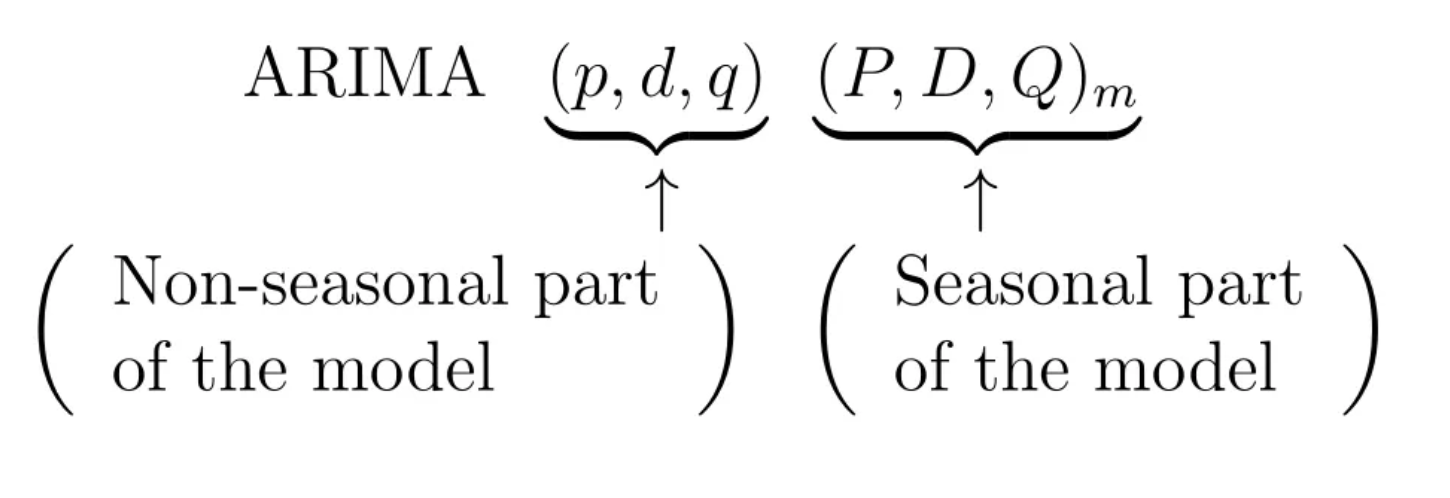

Non-seasonal part of the model:

- **p**: the order of the autoregressive trend
- **d**: the order of the trend differencing
- **q**: the order of the moving average trend

Seasonal part of the model:

- **P**: the order of the autoregressive seasonality. This component captures the relationship between the current value of the series and its past values, specifically in seasonal lags.
- **D**: the order of the seasonal differencing. This component represents the number of differentiations necessary to eliminate seasonality from the series.
- **Q**: the order of the moving average seasonality. This component shows the dependence between the current value and the residual errors of previous predictions at seasonal lags.
- **m**: number of time steps in a seasonal period.

<a name="item1.5.3"></a>
#### 1.5.3. SARIMAX model

The SARIMAX (Seasonal AutoRegressive Integrated Moving Average with exogenous factors) model is an extension of the ARIMA model that incorporates additional features to account for both seasonality and external variables (exogenous factors). It is a time series forecasting model used to capture and predict patterns in data with seasonally repeating patterns and the influence of external factors. SARIMAX is defined by parameters such as order (p, d, q), seasonal order (P, D, Q, m), and optional exogenous variables, providing a versatile framework for forecasting time series data.

<a name="item1.5.4"></a>
#### 1.5.4. PROPHET model

Prophet is a versatile open-source forecasting tool developed by Facebook for time series analysis. It uses an additive model to decompose time series data into trend, seasonality, and holiday components.

<a name="item2"></a>
## 2. Project objectives

The project objectives were:

- Prepare mean temperature data for Spain to forecast it.
- Predict mean temperature using different methods such as ARIMA, SARIMA, SARIMAX, and Prophet
- Evaluate and compare the prediction models.

<a name="item3"></a>
## 3. Data collection and preprocessing

In [1]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from time import sleep
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pmdarima as pm
import statsmodels.api as sm
import matplotlib.dates as mdates

In this project, daily weather data from 1963 to 2022 for each capital of Spain is used to estimate the average weather data for Spain. This data was collected and cleaned in a previous GitHub project called "Climate Change in Spain with Animation."

The table below provides the name of each climate variable in the repository, the unit of measurement, and a brief description of each variable.

|Variable|Unit|Description|
|:--------------|:-----:|:--------------------------------------:|
|Mean Temperature|°C|Mean daily air temperature at 2 meters above the ground|
|Maximum Temperature|°C|Maximum daily air temperature at 2 meters above the ground|
|Minimum Temperature|°C|Minimum daily air temperature at 2 meters above the ground|
|Total Precipitation|mm|Sum of daily precipitation (including rain, showers and snowfall)|
|Maximum Wind Speed|km/h|Maximum wind speed on a day|

Below, weather data from 1963 to 2023 are presented for each capital of Spain.

In [2]:
data_weather = pd.read_csv("Weather.csv", index_col=0, header=0)
data_weather['Time'] = pd.to_datetime(data_weather['Time'])

In [3]:
data_weather.head()

,Time,Mean Temperature,Maximum Temperature,Minumum Temperature,Total Precipitation,Total Snowfall,Maximum Wind Speed,Capital City,Autonomous Community,Latitude,Longitude
0,1963-01-01,4.3,5.9,3.1,27.3,0.0,19.1,La Coruña,Galicia,43.13,-8.46
1,1963-01-02,5.5,6.6,2.9,26.2,0.0,23.1,La Coruña,Galicia,43.13,-8.46
2,1963-01-03,3.5,6.9,0.6,3.3,0.0,17.6,La Coruña,Galicia,43.13,-8.46
3,1963-01-04,6.6,10.6,3.7,8.1,0.0,26.8,La Coruña,Galicia,43.13,-8.46
4,1963-01-05,9.4,10.5,8.5,5.2,0.0,28.2,La Coruña,Galicia,43.13,-8.46


Climate data from the capitals are extrapolated to the communities and the country in general.

In [4]:
def data_daily_average (df_raw):
    
    # freq is the wished frequency in the data set. 
    
    # climate variables to analyze
    variable = ['Mean Temperature','Minumum Temperature','Maximum Temperature','Total Precipitation','Maximum Wind Speed']
    
    df_raw = df_raw.rename(columns= {'Minumum Temperature':'Minimum Temperature'})
    
    #1. Calculate the daily average for each climate variable
    for place in ["Autonomous Community", "Capital City", "Spain"]:
            
        if place != "Spain":
            
            # Data were grouped by specific geographic area (autonomous community or capital) and date.
            # The mean temperature and maximum velocity are averaged for the day, and the total daily precipitation is summed.
            df = df_raw.groupby([place,"Time"]).agg({'Mean Temperature'    :'mean',
                                                     'Minimum Temperature'    :'mean',
                                                 'Maximum Temperature'    :'mean',
                                                 'Maximum Wind Speed'  :'mean', 
                                                 'Total Precipitation' : 'sum'}).reset_index()
        
        else:
            
            df = df_raw.groupby("Time").agg({'Mean Temperature'    :'mean',
                                             'Minimum Temperature'    :'mean',
                                             'Maximum Temperature'    :'mean',
                                             'Maximum Wind Speed'  :'mean', 
                                             'Total Precipitation' : 'sum'}).reset_index()

        df = df.round(2)
        
        # Create a folder to save the charts if it does not exist
        output_folder = f"Data_weather_daily/{place}"
            
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
            
        if place == "Capital City":
            
            data_capital = df.copy()
             # Save the plot in the folder
            output_filename = os.path.join(output_folder, f"Capital.csv")
        
        elif place == "Autonomous Community":
            
            data_community = df.copy()
            output_filename = os.path.join(output_folder, f"Community.csv")
            
        elif place == "Spain":
            
            data_spain = df.copy()
            output_filename = os.path.join(output_folder, f"Spain.csv")

        df.to_csv(output_filename, decimal=',')
        
    return data_capital, data_spain, data_community

In [5]:
data_capital, data_spain, data_community = data_daily_average (data_weather)

In order to explain the forecasting process, I use weather data from Spain for prediction. As mentioned above, the mean temperature will be the variable used for prediction.

In [6]:
data_spain.head()

,Time,Mean Temperature,Minimum Temperature,Maximum Temperature,Maximum Wind Speed,Total Precipitation
0,1963-01-01,6.57,3.82,9.76,18.47,596.3
1,1963-01-02,8.03,4.77,11.17,27.53,677.9
2,1963-01-03,5.01,3.01,7.51,22.04,140.6
3,1963-01-04,5.57,2.63,8.83,16.25,289.0
4,1963-01-05,8.68,6.37,11.96,18.42,287.5


In [7]:
data_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21915 entries, 0 to 21914
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 21915 non-null  datetime64[ns]
 1   Mean Temperature     21915 non-null  float64       
 2   Minimum Temperature  21915 non-null  float64       
 3   Maximum Temperature  21915 non-null  float64       
 4   Maximum Wind Speed   21915 non-null  float64       
 5   Total Precipitation  21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.0 MB


The following are the necessary steps to prepare the data for analysis and forecasting:

<a name="item2.1"></a>
### 2.1. Setting Date Column as Time Series Index

First, it is necessary to set the date as a time series index.

In [8]:
data_spain = data_spain.set_index("Time")

In [9]:
data_spain.head()

,Mean Temperature,Minimum Temperature,Maximum Temperature,Maximum Wind Speed,Total Precipitation
Time,,,,,
1963-01-01,6.57,3.82,9.76,18.47,596.3
1963-01-02,8.03,4.77,11.17,27.53,677.9
1963-01-03,5.01,3.01,7.51,22.04,140.6
1963-01-04,5.57,2.63,8.83,16.25,289.0
1963-01-05,8.68,6.37,11.96,18.42,287.5


<a name="item2.2"></a>
### 2.2. Chronological Arrangement of Time

Time data should be organized chronologically.

In [10]:
data_spain = data_spain.sort_values(by ='Time')

<a name="item2.3"></a>
### 2.3. Frequency of the time series

It's important to ensure that your time series data has a set frequency. 

In [11]:
#Ask the frequency 
print(data_spain.index.freq)

None


If the time series doesn't have a set frequency, it is necessary to establish one.

In [12]:
data_spain = data_spain.sort_index()
data_spain.index.freq = "D"

In [13]:
print(data_spain.index.freq)

<Day>


<a name="item2.4"></a>
### 2.4. Stationary time series

The goal of this project was to predict the mean temperature in Spain. For this, the stationary of the following data set was analyzed:

In [14]:
data_spain[['Mean Temperature']].head()

,Mean Temperature
Time,
1963-01-01,6.57
1963-01-02,8.03
1963-01-03,5.01
1963-01-04,5.57
1963-01-05,8.68


Tests and parameters for analyzing the stationarity of time series include ADF and KPSS tests, time series graphs, time series decomposition, autocorrelation function (ACF), and partial autocorrelation function (PACF).

<a name="item2.4.1"></a>
#### 2.4.1. Augmented Dickey–Fuller test (ADF Test)

In [15]:
def ad_test(x):
    
     from statsmodels.tsa.stattools import adfuller
        
     print ('Results of ADF Test:')
        
     dftest = adfuller(x, autolag = 'AIC')
    
     print("1. ADF Statistic : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
        
     for key, val in dftest[4].items():
        
         print("\t",key, ": ", val)
     
     print()
        
     print("Conclusion of ADF Test:")
    
     if dftest[1] <= 0.05:
            
        print("           The time series has a metric p < 0.05. The time series is difference-stationary.")
        
        adfuller_result = True
        
     else:
        
        print("           The time series has a metric p > 0.05. The time series is not stationary.")
        
        adfuller_result = False
        
     return adfuller_result
        
# p is a metric

<a name="item2.4.2"></a>
#### 2.4.2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS Test)

In [16]:
def kpss_test(timeseries):
    """
    Perform KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on a time series.

    Parameters:
    - timeseries: Time series data for the KPSS test.

    Returns:
    - kpss_result: Boolean indicating whether the time series is trend-stationary (True) or not stationary (False).
    """
    from statsmodels.tsa.stattools import kpss
    
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    
    # Extract and display test results
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    print()
    
    print("Conclusion of KPSS Test:")

    if (kpss_output['p-value'] > 0.05) and (kpss_output['Test Statistic'] < kpss_output['Critical Value (10%)']) and (kpss_output['Test Statistic'] < kpss_output['Critical Value (5%)']) and (kpss_output['Test Statistic'] < kpss_output['Critical Value (2.5%)']) and (kpss_output['Test Statistic'] < kpss_output['Critical Value (1%)']):
        print("               The time series is trend-stationary.")
        kpss_result = True
    else:
        print("               The time series is not stationary.")
        kpss_result = False
    
    return kpss_result


In [17]:
def stationary(df):
    """
    Perform stationarity tests on a time series dataset.

    Parameters:
    - df: Time series data (array) to be tested.

    Returns:
    None (prints the conclusion of ADF and KPSS tests)
    """
    adfuller_result = ad_test(df)  # Sending an array for testing

    print()
    print("**************************")
    print()
    
    kpss_result = kpss_test(df)
    
    print()
    print("**************************")
    print()
    
    print("Conclusion of ADF and KPSS Tests:")
    
    if adfuller_result == True and kpss_result == True:
        print("                     The time series is strictly stationary.")
    elif adfuller_result == False and kpss_result == True:
        print("                     The time series is trend-stationary. Eliminate the trend to make the time series strictly stationary.")
    elif adfuller_result == True and kpss_result == False:
        print("                     The time series is difference-stationary. Use differentiation to make the time series strictly stationary.")
    elif adfuller_result == False and kpss_result == False:
        print("                     The time series is not difference-stationary. Use differentiation to make the time series strictly stationary.")


In [18]:
stationary(data_spain[['Mean Temperature']])

Results of ADF Test:
1. ADF Statistic :  -13.479096430065843
2. P-Value :  3.267875289238229e-25
3. Num Of Lags :  47
4. Num Of Observations Used For ADF Regression: 21867
5. Critical Values :
	 1% :  -3.430649083907571
	 5% :  -2.861672185197276
	 10% :  -2.566840358460621

Conclusion of ADF Test:
           The time series has a metric p < 0.05. The time series is difference-stationary.

**************************

Results of KPSS Test:
Test Statistic            0.32108
p-value                   0.10000
#Lags Used               88.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

Conclusion of KPSS Test:
               The time series is trend-stationary.

**************************

Conclusion of ADF and KPSS Tests:
                     The time series is strictly stationary.


/Users/Cinti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<a name="item2.4.3"></a>
#### 2.4.3. Graph the Data Series

In [19]:
def plot_time_series(df, name="Time Series"):
    """
    Generate a plot for the given time series data.

    Parameters:
    - df: Time series data to be plotted.
    - name: Name of the time series (default: "Time Series").

    Returns:
    - fig: Matplotlib figure object containing the time series plot.
    """
    # Create a figure
    fig = plt.figure(figsize=(12, 6))
    
    # Add axes to the figure (axes object)
    ax = fig.add_subplot(111)
    
    # Plot the time series on the axes object
    ax.plot(df, label=name, color='blue')
    
    # Set plot attributes
    ax.set_title(name)
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean Temperature')
    ax.legend()
    ax.grid(True)
    
    return fig


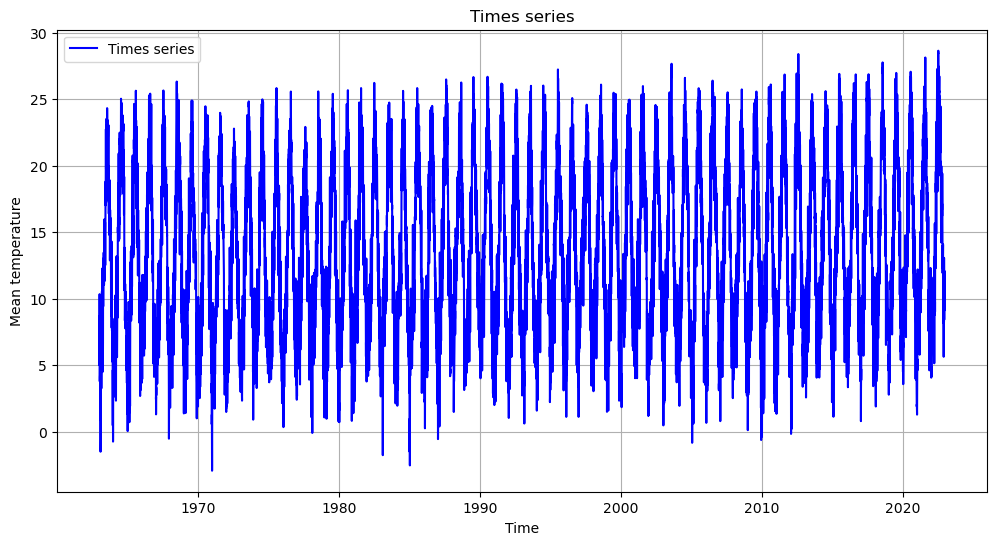

In [20]:
fig = Graphic_Serie(data_spain['Mean Temperature'])
plt.show()

It may be required to limit the time period for studying stationary.

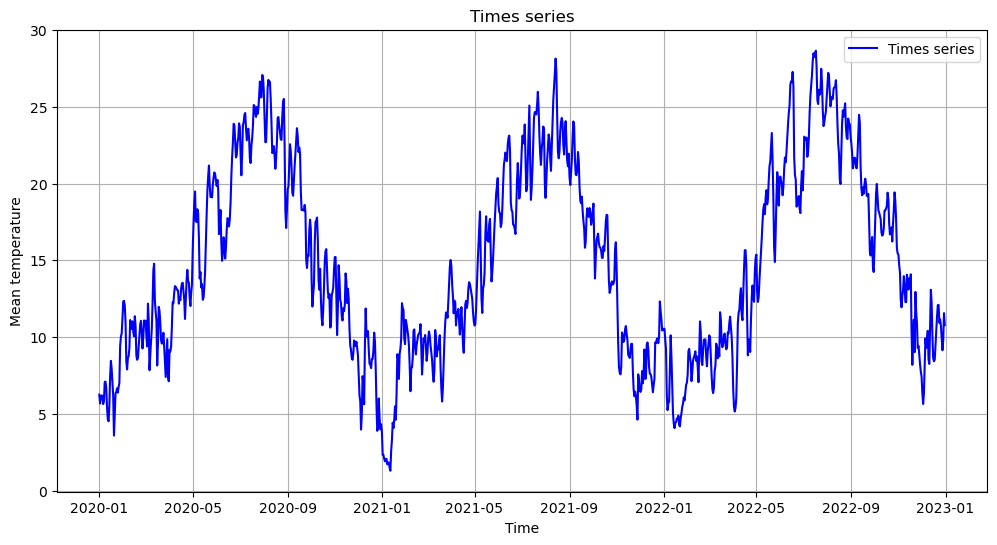

In [21]:
fig = Graphic_Serie(data_spain[data_spain.index.year.isin([2020, 2021, 2022])]['Mean Temperature'])
plt.show()

---------
**Partial conclusion.**

- By reducing the time interval of the time series, it is possible to observe that the series is non-stationary.

- The data graph illustrates a pattern where the temperature rises during summer and falls in the following months, repeating annually.

---------


<a name="item2.4.4"></a>
#### 2.4.4. Time series decomposition

In [22]:
def decomposition_series(df):
    """
    Perform time series decomposition using the additive model and visualize its components.

    Parameters:
    - df: Time series data to be decomposed.

    Returns:
    - fig: Matplotlib figure object containing subplots for the trend, seasonal, and residual components.
    """
    import statsmodels.api as sm

    # Perform time series decomposition
    decomposition = sm.tsa.seasonal_decompose(df, model='additive')

    # Extract the components
    Trend = decomposition.trend
    Seasonal = decomposition.seasonal
    Resid = decomposition.resid

    # Plot the components
    fig = plt.figure(figsize=(12, 8))

    plt.subplot(311)  # subplot(num rows, num columns, position of the subplot in that grid)
    plt.plot(Trend, label='Trend')
    plt.title('Trend component')
    plt.legend()

    plt.subplot(312)
    plt.plot(Seasonal, label='Seasonal')
    plt.title('Seasonal component')
    plt.legend()

    plt.subplot(313)
    plt.plot(Resid, label='Resid')
    plt.title('Resid component')
    plt.legend()

    plt.tight_layout()

    return fig


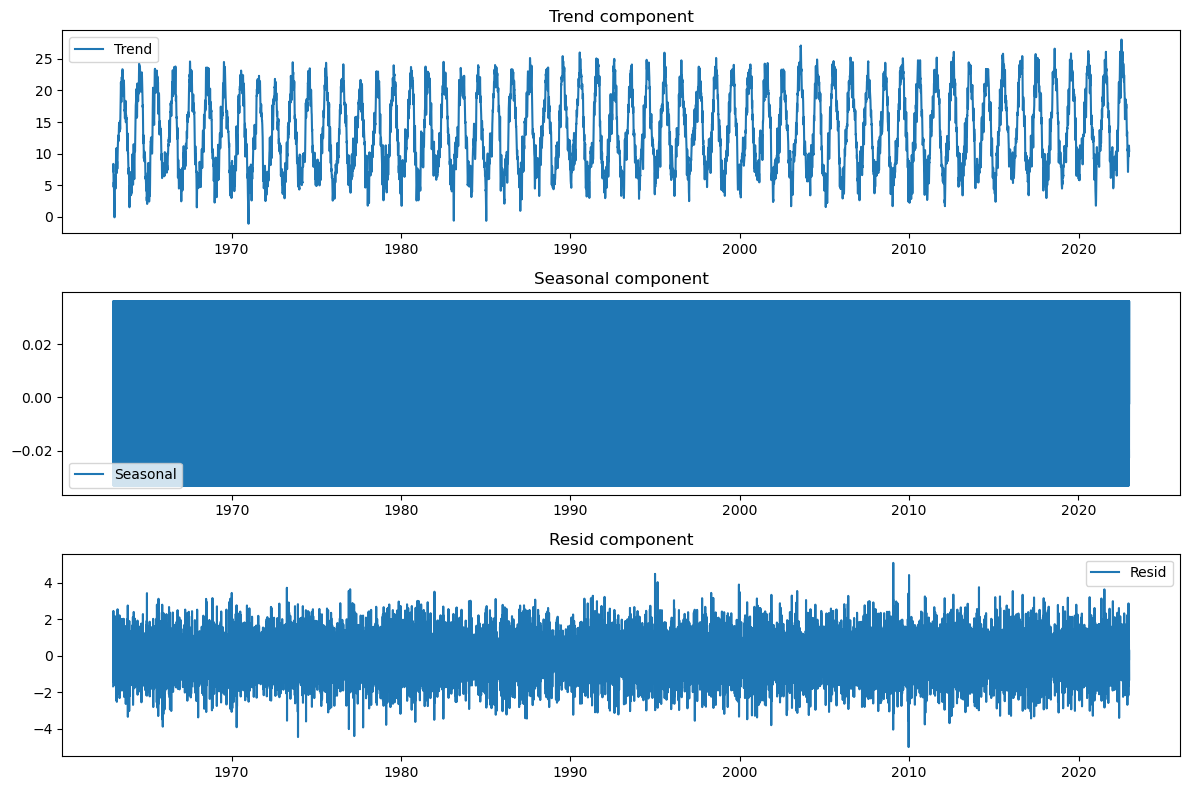

In [23]:
fig_desc = descomposition_serie(data_spain['Mean Temperature'])

plt.show()

The time range has been reduced in order to observe the stationary behavior of the data better.

The graph presented below illustrates the trend, seasonal, and residual components of data from the years 2020 to 2022.

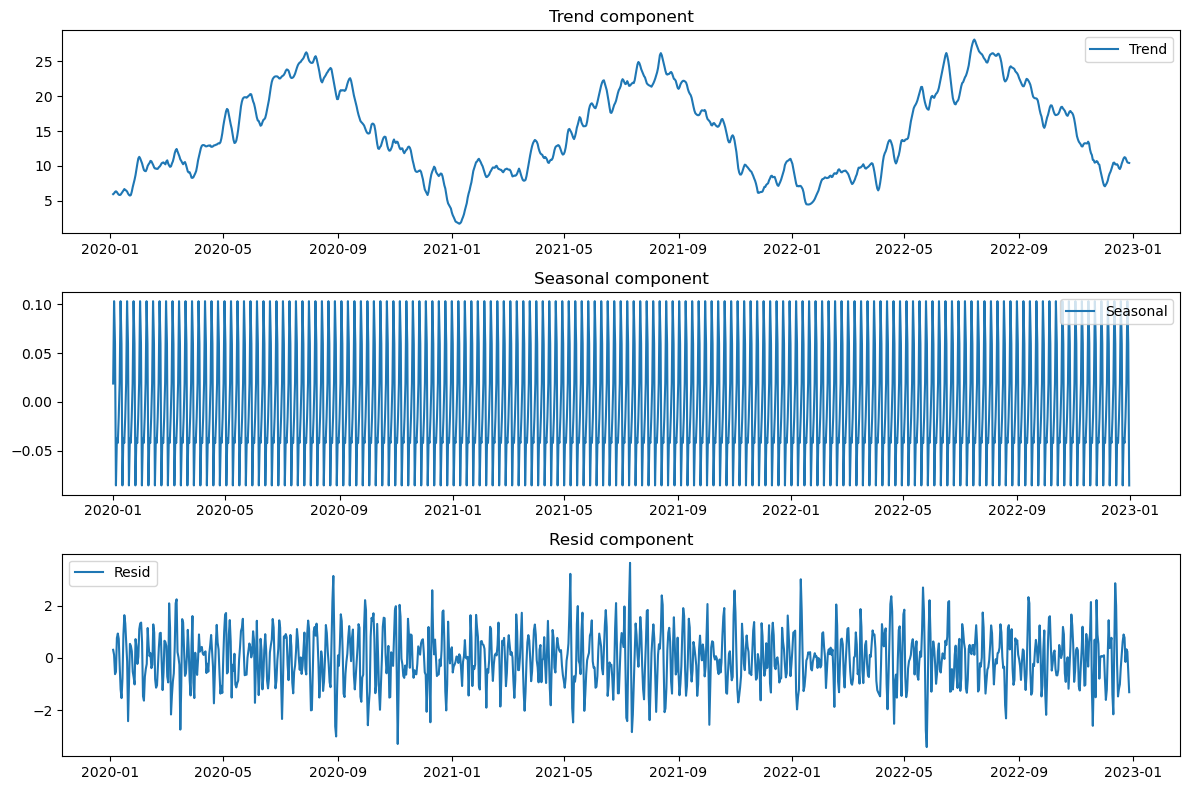

In [24]:
fig_desc = descomposition_serie(data_spain[data_spain.index.year.isin([2020, 2021, 2022])]['Mean Temperature'])
plt.show()

The below graphs only represent data for the year 2020.

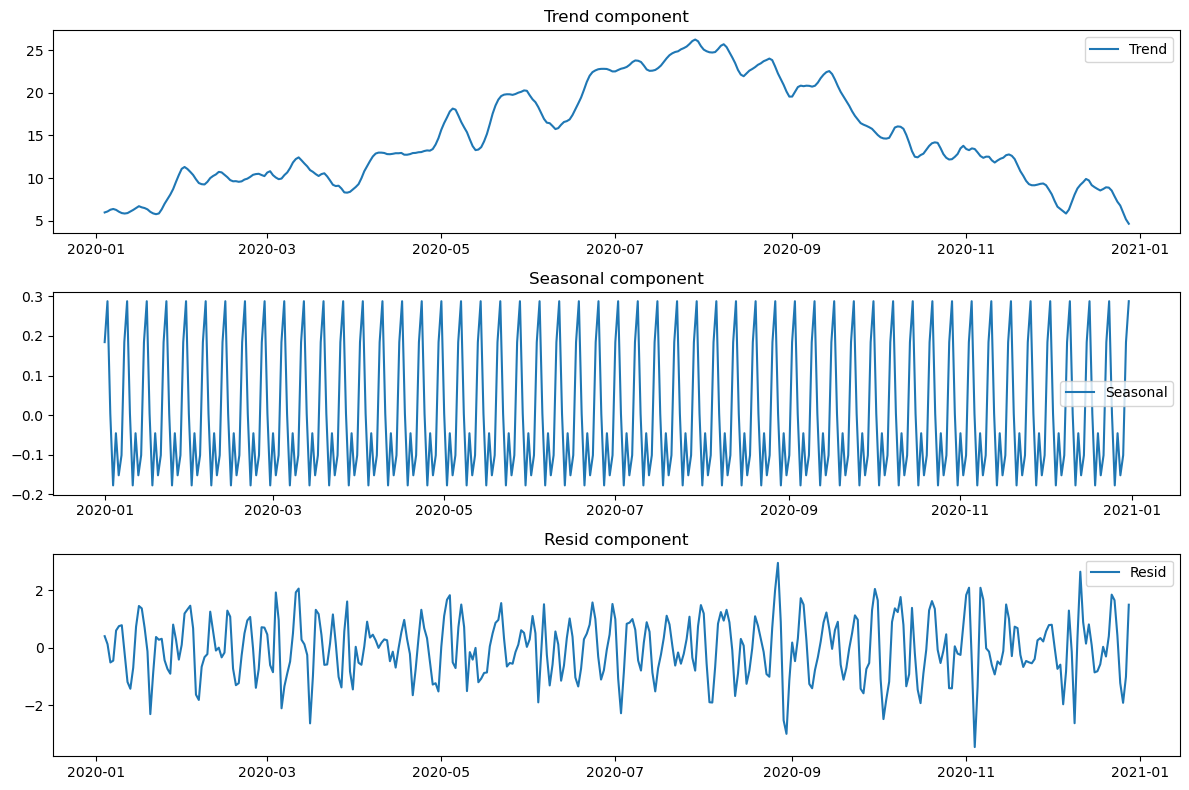

In [25]:
fig_desc = descomposition_serie(data_spain[data_spain.index.year.isin([2020])]['Mean Temperature'])
plt.show()

--------

**Partial conclusion.**
Upon examining the decomposition graphs, it becomes clear that:

- The trend component shows that the dataset has a temperature trend, with temperatures rising during the summer months and falling afterwards.
- The seasonal component displays repetitive patterns, indicating the presence of seasonality in the data. Without a seasonal component, the data would form a straight line with a value of zero or small variations around it.

The obtained results are consistent with the ones obtained through graphing the data series.

--------


<a name="item2.4.5"></a>
#### 2.4.5. Autocorrelation in Time Series Data

In [26]:
def Autocorrelation (df):

    from statsmodels.graphics import tsaplots


    # Stands for Time Series Analysis Plots (TSA Plots)
    fig = plt.figure(figsize = (12,6))
    
    tsaplots.plot_acf(df, ax=fig.gca(), lags=60)

    plt.xlabel("Lag at k")
    plt.ylabel("Correlation coefficient")
    #plt.show()
    
    return fig

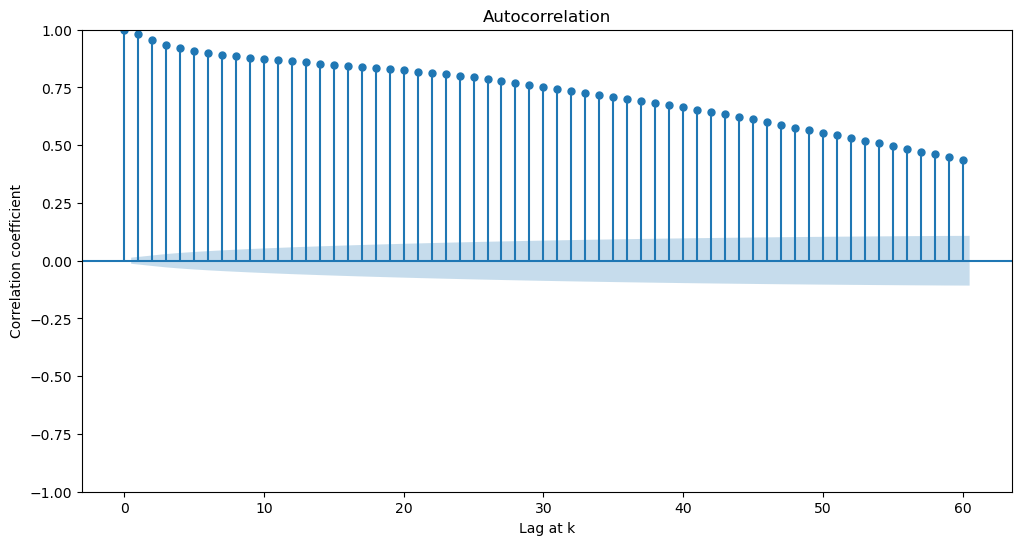

In [27]:
fig_ACF = Autocorrelation(data_spain['Mean Temperature'])
plt.show()

The blue shaded area on an autocorrelation plot typically represents confidence bounds, and values falling within this area are not considered statistically significant.


--------

**Partial conclusion.**

Significant values are observed (outside the blue area) that slowly decay. This demonstrates that time series is not stationarity because it has a trend.

For a stationary time series, the ACF will drop to zero relatively quickly.

----

<a name="item2.4.6"></a>
#### 2.4.6. Partial Autocorrelation in Time Series Data

In [28]:
# partial autocorrelation

def Partial_Autocorrelation (df):

    from statsmodels.graphics import tsaplots

    fig = plt.figure(figsize = (12,6))
    
    tsaplots.plot_pacf(df, ax=fig.gca()) 

    plt.title("Partial Autocorrelation")
    plt.xlabel("Lag at k")
    plt.ylabel("Correlation Coefficient")
    #plt.show()
    
    return fig

/Users/Cinti/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


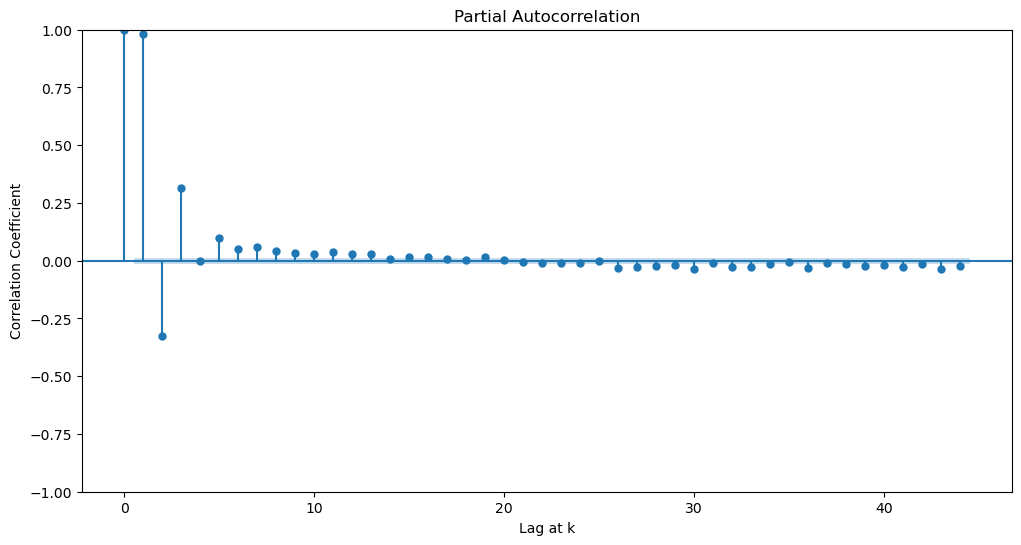

In [29]:
fig_PACF = Partial_Autocorrelation(data_spain['Mean Temperature'])

--------

**Partial conclusion.**

Most of the values are significant and these are outside the blue area, demonstrating a strong correlation between the data.

------



It is evident that the series has a trend and seasonality, indicating that it is not stationary. Therefore, the series must be differentiated to make it stationary.



There are two types of differencing: ordinary and seasonal. After differentiation, it is necessary to analyze the stationarity of the time series. Sometimes it may be necessary to apply multiple differentiations to achieve stationarity in a time series.

Next, each differentiation will be explained:

#### Ordinary differencing 

When a differentiation is made, NAN data is generated which must be eliminated to continue the analysis.

In [30]:
df_difference = data_spain[['Mean Temperature']]
df_difference.diff().dropna()

,Mean Temperature
Time,
1963-01-02,1.46
1963-01-03,-3.02
1963-01-04,0.56
1963-01-05,3.11
1963-01-06,-0.02
...,...
2022-12-27,-0.84
2022-12-28,-0.76
2022-12-29,0.63


##### Seasonal differencing 

Data set has daily data with an annual seasonality. So the differentiation station is:

In [31]:
seasonal_periodicity = 365  # or 366 depending on the year

df_difference = data_spain[['Mean Temperature']]
df_difference['seasonal_difference'] = df_difference['Mean Temperature'].diff(periods=seasonal_periodicity)

/var/folders/_3/dkyg13r11817g40blrst6j740000gp/T/ipykernel_869/3624275665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_difference['seasonal_difference'] = df_difference['Mean Temperature'].diff(periods=seasonal_periodicity)


When we make this differentiation, the first 365 days are NAN. These NAN must be eliminated to continue the analysis.

In [32]:
df_difference.head(5)

,Mean Temperature,seasonal_difference
Time,,
1963-01-01,6.57,NaN
1963-01-02,8.03,NaN
1963-01-03,5.01,NaN
1963-01-04,5.57,NaN
1963-01-05,8.68,NaN


In [33]:
df_difference.tail(5)

,Mean Temperature,seasonal_difference
Time,,
2022-12-27,9.90,-2.42
2022-12-28,9.14,-2.55
2022-12-29,9.77,-1.40
2022-12-30,11.56,1.13
2022-12-31,10.78,0.29


In [34]:
# Elimina los primeros 12 meses que ahora contienen valores NaN
df_difference = df_difference[365:]

In [35]:
df_difference.head()

,Mean Temperature,seasonal_difference
Time,,
1964-01-01,4.53,-2.04
1964-01-02,4.25,-3.78
1964-01-03,5.22,0.21
1964-01-04,5.11,-0.46
1964-01-05,4.47,-4.21


<a name="item3"></a>
## 5. Prediction models

The autoregressive integrated moving average model (ARIMA), the seasonal autoregressive integrated moving average model (SARIMA), Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX), and PROPHET are widely employed in time series analysis. In this project, these models are utilized for predicting the average Mean Temperature of Spain.

To apply prediction algorithms, I use the undifferentiated time series. 

- ARIMA models, through their parameters, determine the amount of differentiation necessary to achieve stationarity of the series.

- The Prophet model is a flexible time series model that can handle trends and seasonalities. It is robust and can work with non-stationary data.

<a name="item5.1"></a>
## 5.1. ARIMA model

<a name="item5.1.1"></a>
#### 5.1.1. Train-Test Data Split

As mentioned above, to evaluate your model's performance, you should split your time series data into separate training and test sets. The training set is used to train the model, while the test set is reserved to evaluate its accuracy in predicting new data. 

In time series analysis, data is usually split sequentially, designating the initial portion as the training set and the remaining as the test set.

Remember that the size of your training and test sets can significantly affect your model's performance. A training set that is too small can lead to an underfitting model, while a huge one can lead to overfitting. Striking the right balance between the sizes of these subsets is crucial. 

In [36]:
def Train_Test_data(df, test_percentage):
    """
    Split time series data into training and testing sets.

    Parameters:
    - df (pd.DataFrame): Time series data.
    - test_percentage (float): Percentage of data to be used for testing.

    Returns:
    - X_train (pd.DataFrame): Training data.
    - X_test (pd.DataFrame): Testing data.
    """
    # Calculate the number of data points for testing
    num_test = int(len(df) * test_percentage)

    # Divide the time series into training and testing data
    X_train = df.iloc[:len(df) - num_test]
    X_test = df.iloc[len(df) - num_test:]
    
    # Display information about the training and testing data
    print(f"Training data: {len(X_train)}")
    print(X_train.tail(5))
    print("\n\n")
    print(f"Test data: {len(X_test)}")
    print(X_test.head(5))

    return X_train, X_test


In [37]:
X_train, X_test = Train_Test_data(data_spain[['Mean Temperature']], test_percentage = 0.10)

Training data: 19724
            Mean Temperature
Time                        
2016-12-27              7.01
2016-12-28              7.06
2016-12-29              6.57
2016-12-30              5.52
2016-12-31              4.75



Test data: 2191
            Mean Temperature
Time                        
2017-01-01              3.81
2017-01-02              4.85
2017-01-03              6.42
2017-01-04              7.32
2017-01-05              6.61


<a name="item5.1.2"></a>
#### 5.1.2.  Auto_ARIMA Parameter Selection

The following function explores alternative ARIMA models based on specified parameters and returns a DataFrame with the details of each model, including the AIC (Akaike Information Criterion) values.

In [39]:
def S_ARIMA_options(X_train, d_values, D_values, startp, startq, maxp, maxq, startP, startQ, maxP, maxQ, m_value, seasonal_value, stationary_value, exog, exog_var):
    """
    Explore SARIMA model options and select the best alternative based on AIC.

    Parameters:
    - X_train (pd.Series): Training time series data.
    - d_values (list): List of potential non-seasonal differences (d values).
    - D_values (list or int): List of potential seasonal differences (D values) or 0 if no seasonality.
    - startp, startq, maxp, maxq (int): Parameters for non-seasonal ARIMA orders.
    - startP, startQ, maxP, maxQ (int): Parameters for seasonal ARIMA orders.
    - m_value (int): Seasonal period for the time series.
    - seasonal_value (bool): True if the time series has seasonal components, False otherwise.
    - stationary_value (bool): True if the time series is stationary, False otherwise.
    - exog_var (pd.Series): Exogenous variable.

    Returns:
    - S_ARIMA_op (pd.DataFrame): DataFrame containing the details of alternative SARIMA models, including AIC.

    Note:
    - The function uses the pmdarima library for automatic SARIMA model selection.
    """
    import warnings
    import pmdarima as pm

    # Suppress all warnings
    warnings.filterwarnings("ignore")

    # List to store model details
    models = []

    def explore_models(d_op, D_op, exog_var):
        """
        Explore SARIMA models with given parameters.

        Parameters:
        - d_op (int): Non-seasonal difference.
        - D_op (int): Seasonal difference.
        - exog_var (pd.Series): Exogenous variable.

        Returns:
        - Tuple containing model details.
        """
        print(f" Alternative models with d: {d_op} and D: {D_op}")
        print()

        # Automatic SARIMAX model selection using pmdarima
        model_arima = pm.auto_arima(
            y=X_train,
            d=d_op,
            D=D_op,
            start_p=startp,
            start_q=startq,
            max_p=maxp,
            max_q=maxq,
            start_P=startP,
            start_Q=startQ,
            max_P=maxP,
            max_Q=maxQ,
            m=m_value,
            test='kpss',
            seasonal=seasonal_value,
            stationary=stationary_value,
            exogenous=exog_var if exog else None,
            trace=True,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )

        # Tuple containing model details
        result = (d_op, D_op, model_arima.get_params()['order'], model_arima.get_params()['seasonal_order'], model_arima.aic())
        return result

    # Explore alternative models based on the presence of seasonal differences (D_values)
    if D_values == 0:
        # Explore models for non-seasonal differences only
        models = [explore_models(d_op, 0, None) for d_op in d_values]
    elif exog:
        # Explore models with exogenous variable and seasonal differences
        models = [explore_models(d_op, D_op, exog_var) for d_op in d_values for D_op in D_values]
    else:
        # Explore models with seasonal differences only
        models = [explore_models(d_op, D_op, None) for d_op in d_values for D_op in D_values]

    # Convert the list of models to a DataFrame
    S_ARIMA_op = pd.DataFrame(models, columns=['d', 'D', 'Order', 'Seasonal order', 'AIC'])

    return S_ARIMA_op


The autoarima function has a parameter named seasonal. 'Seasonal = False' indicates that the ta prediction through the ARIMA model and not SARIMA. The SARIMA model takes into account the seasonality of the data set.

In [40]:
# Define values for differencing (d) and seasonal differencing (D)
d_values = [0, 1, 2]
D_values = 0

# Set initial values and ranges for p, q, P, Q
startp = 0
startq = 0
maxp = 3
maxq = 3
startP = 0
startQ = 0
maxP = 0
maxQ = 0

# Set the seasonality parameters
m_value = 0  # No seasonality
seasonal_value = False  # No seasonal components need to be adjusted
stationary_value = False  # The series is not assumed to be stationary

# Disable exogenous variables
exog = False
exog_var = 0  # Placeholder for no exogenous variables

# Find the best ARIMA model
ARIMA_op = S_ARIMA_options(X_train, d_values, D_values, startp, startq, maxp, maxq, startP, startQ, maxP, maxQ, m_value, seasonal_value, stationary_value, exog, exog_var)

 Alternative models with d: 0 and D: 0

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=161973.490, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=135668.547, Time=1.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=57948.016, Time=1.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=57869.997, Time=2.69 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=57288.347, Time=4.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.93 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=56772.720, Time=5.90 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=56886.282, Time=2.18 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=56769.002, Time=11.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=56766.402, Time=5.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=57180.185, Time=2.75 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=57799.978, Time=1.4

In [41]:
# Display the results and the best model based on AIC
print(ARIMA_op)
print()

   d  D      Order Seasonal order           AIC
0  0  0  (2, 0, 3)   (0, 0, 0, 0)  56715.175896
1  1  0  (1, 1, 3)   (0, 0, 0, 0)  56767.258829
2  2  0  (3, 2, 0)   (0, 0, 0, 0)  63115.617208



In [42]:
print("The best model is:")
print()
print(ARIMA_op.sort_values(by='AIC', ascending=True).head(1))

The best model is:

   d  D      Order Seasonal order           AIC
0  0  0  (2, 0, 3)   (0, 0, 0, 0)  56715.175896


<a name="item5.1.3"></a>
#### 5.1.3. ARIMA Model Creation

In [43]:
# Create ARIMA Model 
model_arima = sm.tsa.ARIMA(X_train, order=(2, 0, 3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Mean Temperature   No. Observations:                19724
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -28350.686
Date:                Tue, 23 Jan 2024   AIC                          56715.372
Time:                        19:33:11   BIC                          56770.599
Sample:                    01-01-1963   HQIC                         56733.453
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3105      0.800     16.636      0.000      11.742      14.879
ar.L1          1.5559      0.020     79.429      0.000       1.518       1.594
ar.L2         -0.5587      0.019    -28.867      0.0

<a name="item5.1.4"></a>
#### 5.1.4. Analysis of the model residual

The “residuals” in a time series model are what is left over after fitting a model. That is, the residual component represents the unexplained part of the time series that the model couldn't capture.

In [44]:
# 'residuals' is an attribute that contains the residuals of the ARIMA model.
residuals = model_arima_fit.resid 
residuals.head(5)

Time
1963-01-01   -6.740522
1963-01-02    1.348877
1963-01-03   -3.610897
1963-01-04    2.170880
1963-01-05    1.818927
Freq: D, dtype: float64

Residuals are useful in checking whether a model has adequately captured the information in the data. Subsequently, the model's residuals will be examined to assess the accuracy of the time series forecasting model.

Tests and parameters for analyzing the residual include: residual graph, histogram and density of residual, autocorrelation function, and decomposition of the residual.

<a name="item5.1.4.1"></a>
##### 5.1.4.1. Histogram and Density

In [45]:
def Hist_Dens_resid(residuals):
    import seaborn as sns

    # Set the style of the plot
    sns.set_style("whitegrid")

    # Create a figure with a specific size
    fig = plt.figure(figsize=(8, 6))

    # Create a combined histogram and density plot of residuals
    sns.histplot(residuals, kde=True, color="b")

    # Set the title, xlabel, and ylabel for the plot
    plt.title('Histogram and Density of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency/Density')

    return fig


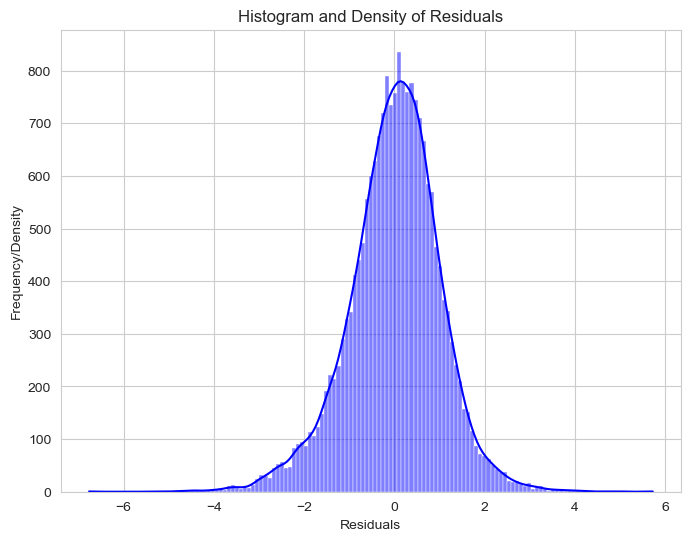

In [46]:
fig_hist_dens = Hist_Dens_resid(residuals)
plt.show()

----

**Parcial conclusion.**

In conclusion, the characteristics observed in the histogram of residuals, with a center around 0.3, a tail reaching 5.9, and another reaching 6.5, suggest that the model does not capture the trend and pattern of the data.

----

<a name="item5.1.4.2"></a>
##### 5.1.4.2. Residuals graph 

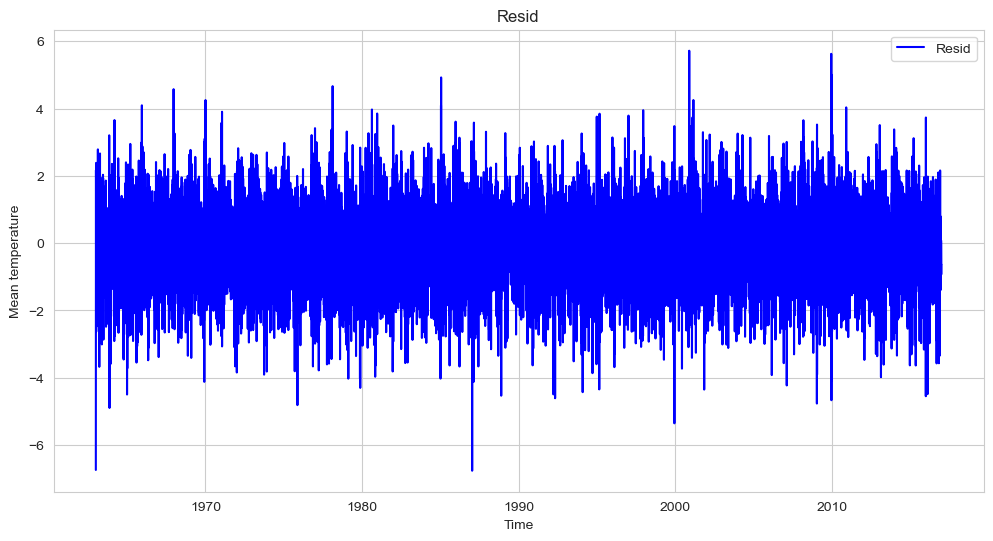

In [47]:
# Residual errors line graph

fig = Graphic_Serie(residuals, "Resid")


---
**Parcial conclusion.**

The residuals graph looks like white noise.

-----

<a name="item5.1.4.3"></a>
##### 5.1.4.3. Autocorrelation Function 

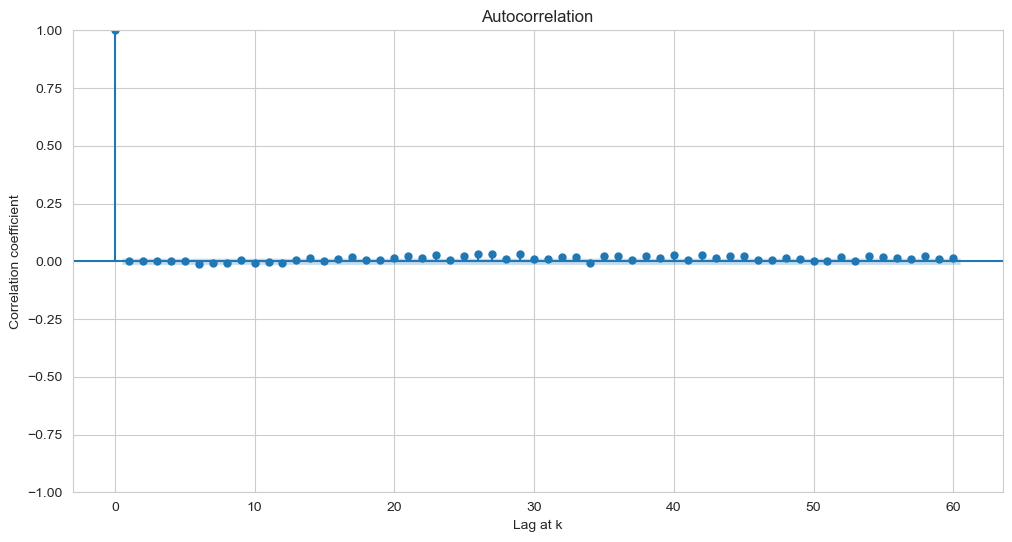

In [48]:
fig_ACF = Autocorrelation(residuals)


----
**Partial conclusion.**

When observing values slightly above the shaded area in the ACF of residuals, there might be patterns or structures in the residuals that haven't been fully captured by the model. 

----

<a name="item5.1.4.4"></a>
##### 5.1.4.4. Analyzing the decomposition of residuals

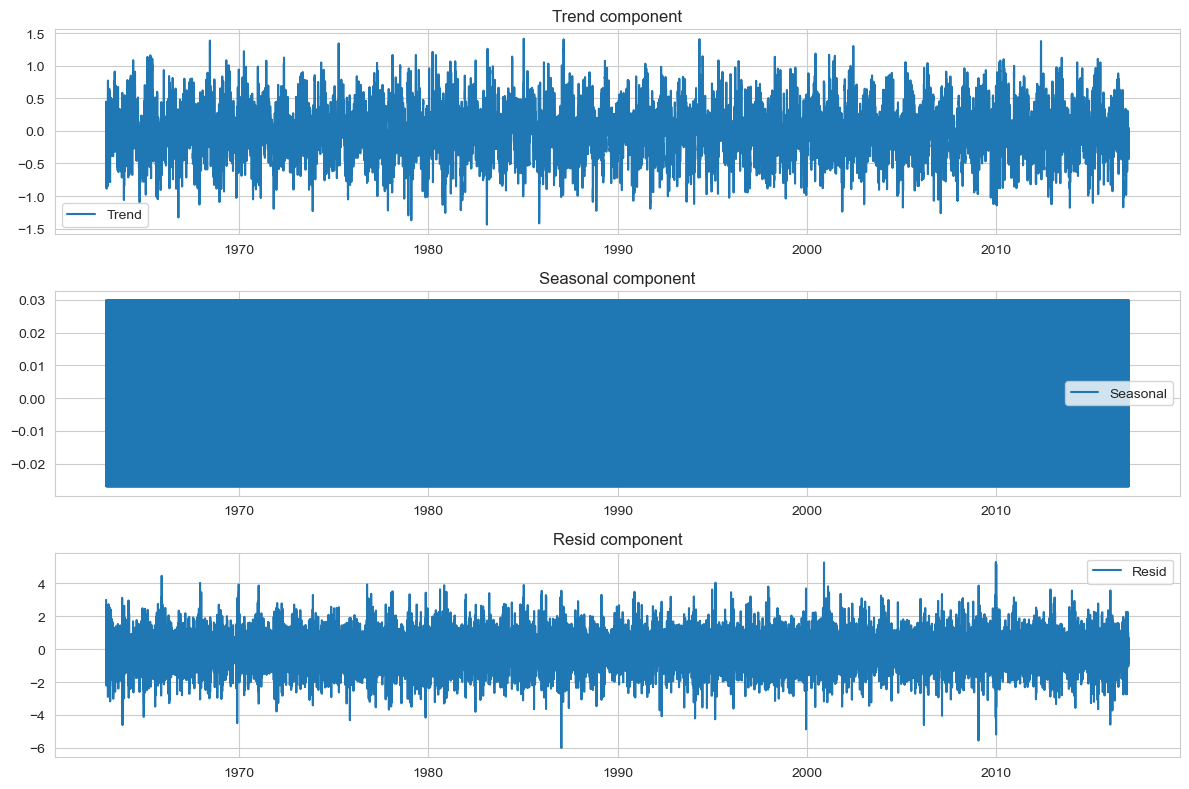

In [49]:
fig_desc = descomposition_serie(residuals)

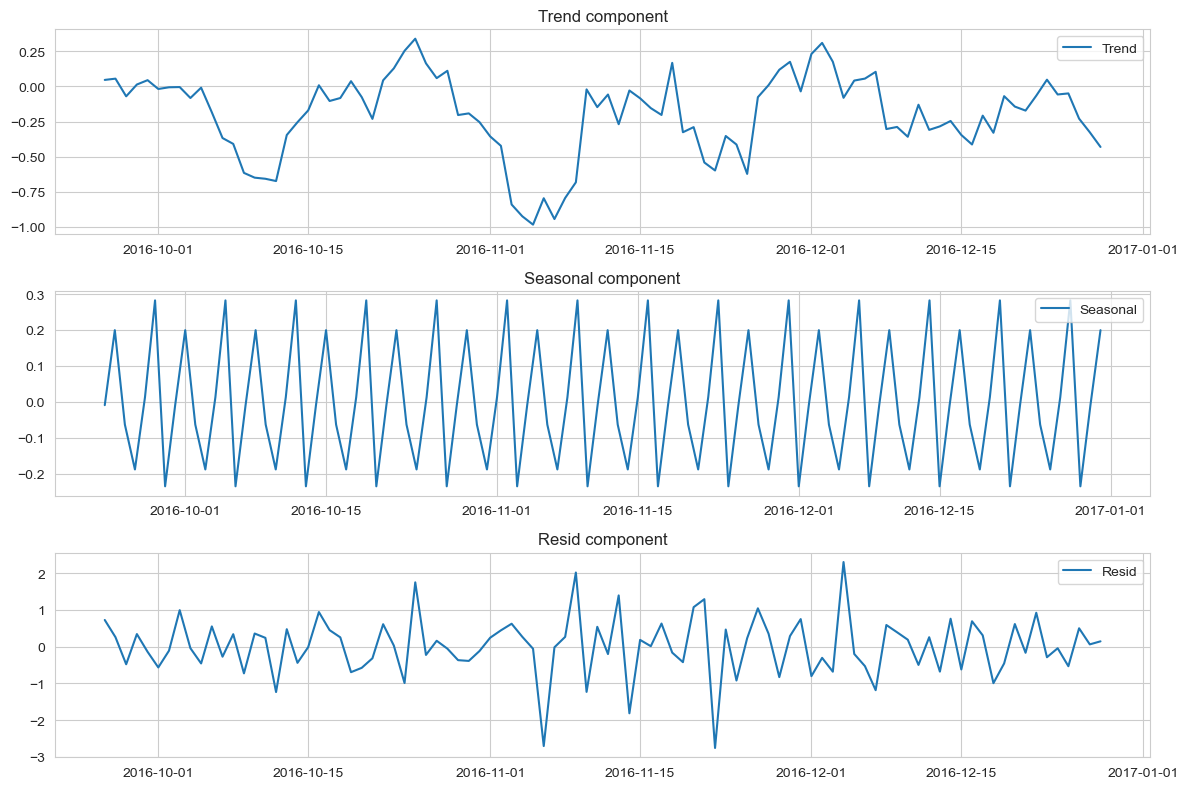

In [50]:
fig_desc = descomposition_serie(residuals[-100:])

----

**Parcial conclusion.**

When examining the decomposition of the residuals, patterns are observed in the this. This patterns indicate that the model did not succeed in making precise predictions.

----

A function is created with all the necessary steps to analyze the residual of a model.

In [51]:
def analysis_residual(residuals):
    """
    This function analyzes the residuals of a time series model.

    Parameters:
    - residuals: It is a series of residual errors obtained from fitting the model.

    Steps:
    1. Line plot of residual errors over time.
    2. Decomposition of the residual series into trend, seasonality, and noise.
    3. Autocorrelation plot of residuals to identify temporal dependencies.
    4. Partial autocorrelation plot of residuals for direct relationships.
    5. Histogram and density plot of residuals to assess distribution.

    Displayed plots provide insights into the performance and adequacy of the model.
    """
    # 1. Line plot of Residual Errors
    fig = Graphic_Serie(residuals, "Resid")

    # 2. Decomposition of Residual Series
    fig_desc = descomposition_serie(residuals)

    # 3. Autocorrelation Plot of Residuals
    fig_ACF = Autocorrelation(residuals)

    # 4. Partial Autocorrelation Plot of Residuals
    fig_PACF = Partial_Autocorrelation(residuals)

    # 5. Histogram and Density Plot of Residuals
    fig_hist_dens = Hist_Dens_resid(residuals)

    # Display the plots
    plt.show()


<a name="item5.1.5"></a>
#### 5.1.5. Prediction

In [52]:
ARIMA_pred= model_arima_fit.get_prediction(start= len(X_train), end= len(X_train)+ len(X_test)-1)

In [53]:
print(ARIMA_pred)

In [54]:
import matplotlib.pyplot as plt

def Graphic_predict(X_train, X_test, model_predict):
    """
    Visualize predictions made by a time series model.

    Parameters:
    - X_train: DataFrame, training data with time series information.
    - X_test: DataFrame, testing data with time series information.
    - model_predict: Model prediction result object.

    Returns:
    - fig: Matplotlib Figure object.
    """
    try:
        # Get the predicted mean values
        predicted_mean = model_predict.predicted_mean

        # Get the confidence intervals (e.g., at 95%)
        confidence_interval = model_predict.conf_int(alpha=0.05)

        # Lower bound of the confidence interval
        lower_bound = confidence_interval.loc[:, 'lower Mean Temperature']

        # Upper bound of the confidence interval
        upper_bound = confidence_interval.loc[:, 'upper Mean Temperature']

    except:  # For Prophet model
        X_train = X_train.set_index('ds')
        X_test = X_test.set_index('ds')
        model_predict = model_predict.set_index('ds')

        # Get the predicted mean values
        predicted_mean = model_predict['yhat']

        # Lower bound of the confidence interval
        lower_bound = model_predict['yhat_lower']

        # Upper bound of the confidence interval
        upper_bound = model_predict['yhat_upper']

    # Create a figure with two subplots in one row and two columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting training, testing, and prediction data on the first subplot
    ax1.plot(X_train, color="black", linestyle='-', label='Training Data')
    ax1.plot(X_test, color="blue", linestyle='-', label='Testing Data')
    ax1.fill_between(X_test.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Interval')
    ax1.plot(predicted_mean, color="red", linestyle='-', label='Model Predictions')
    ax1.set_title('Training, Testing, and Prediction Data')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Temperature Mean')
    ax1.legend()

    # Plotting testing and prediction data on the second subplot
    ax2.plot(X_test, color="blue", linestyle='-', label='Testing Data')
    ax2.fill_between(X_test.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Interval')
    ax2.plot(predicted_mean, color="red", linestyle='-', label='Model Predictions')
    ax2.set_title('Testing and Prediction Data')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Temperature Mean')
    ax2.legend()

    return fig


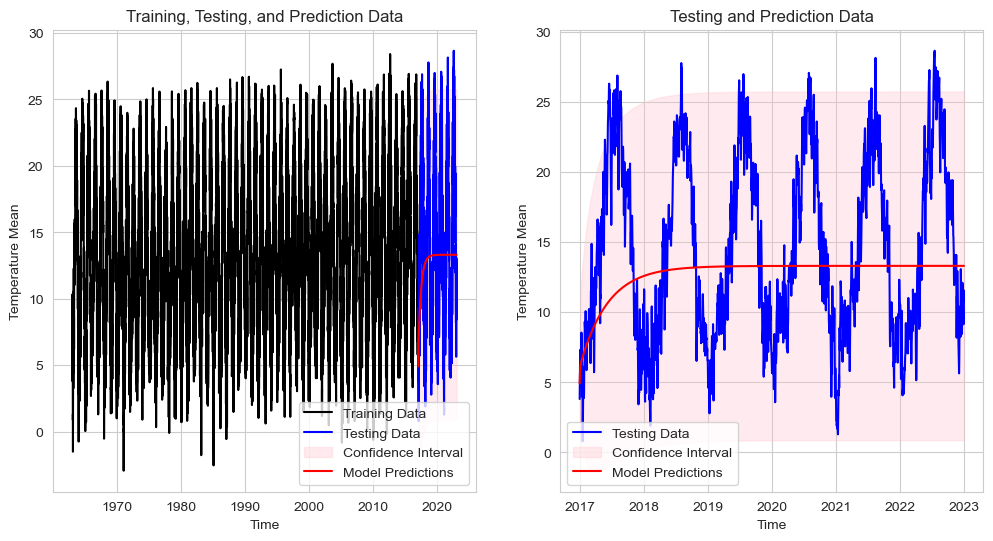

In [55]:
fig = Graphic_predict(X_train, X_test, ARIMA_pred)
plt.show()


----
**Partial conclusion.**

The results from the ARIMA model show a noticeable discrepancy from the actual data, indicating that the model's predictions do not align well with the real observations.

----

<a name="item5.1.6"></a>
#### 5.1.6. Model Metric

Although I already observe that the model doesn't align with the data, I will proceed to analyze the model metrics.

Model metrics help to evaluate the performance of a model and allows to qualitatively compare two models. 

In [56]:
def Metrics(y_test, yhat, name_model):
    """
    Calculate and print various metrics for model evaluation.

    Parameters:
    - y_test: Actual values of the target variable
    - yhat: Predicted values of the target variable
    - name_model: Name or identifier of the model

    Returns:
    - metric: DataFrame containing calculated metrics
    """

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import pandas as pd
    import numpy as np

    # Root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, yhat))
    # Relative Absolute Error
    RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
    # Relative Square Error
    RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
    # R**2
    R2 = r2_score(y_test, yhat)

    # Create a DataFrame for metrics
    metric = pd.DataFrame({
        'Model': [name_model],
        'MAE': [round(mean_absolute_error(y_test, yhat),2)],
        'MSE': [round(mean_squared_error(y_test, yhat),2)],
        'RMSE': [round(rmse,2)],
        'R**2': [round(R2,2)],
        'RAE': [round(RAE,2)],
        'RSE': [round(RSE,2)]})
    
    print(metric.head())

    return metric


In [57]:
metric_arima = Metrics(X_test.values,ARIMA_pred.predicted_mean.values,'ARIMA')

   Model   MAE    MSE  RMSE  R**2      RAE      RSE
0  ARIMA  5.59  43.89  6.62 -0.07  2230.31  2448.34


----
**Partial conclusion.**

A negative R-squared can occur when the model performs worse than a simple model that predicts the mean of the dependent variable for all cases. In other words, the model isn't capturing any structure or pattern in the data and, instead, is making predictions that are worse than simply using the mean.

In this way, it confirmed that the model is not appropriate for this data.

----


<a name="item5.2"></a>
## 5.2 Sarima model

In SARIMA models, higher frequencies result in increased RAM requirements. Therefore, if you have daily data, it is advisable to consider converting it to a monthly or quarterly frequency.

In this way, the next step involves changing the data frequency from daily to monthly.

<a name="item5.2.1"></a>
### 5.2.1. Frequency of the time series

In [58]:
def data_monthly(df):
    """
    This function converts the frequency of the data from daily to monthly.
    """

    # Extract the year from the index and create a new 'Year' column
    df["Year"] = df.index.year

    # Group by year and month, and aggregate the specified columns
    df = df.groupby([df["Year"], df.index.month]).agg({
        'Mean Temperature': 'mean',
        'Minimum Temperature': 'mean',
        'Maximum Temperature': 'mean',
        'Maximum Wind Speed': 'mean',
        'Total Precipitation': 'sum'
    }).reset_index()

    # Rename the 'Time' column to 'Month'
    df = df.rename(columns={'Time': 'Month'})

    # Combine 'Year' and 'Month' columns to create a new 'Time' column
    df['Time'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

    # Convert the 'Time' column to a period representing the month
    #df['Time'] = df['Time'].dt.to_period('M')

    df.index.freq = "M"

    # Set the 'Time' column as the index and drop the 'Month' and 'Year' columns
    df.set_index('Time', inplace=True)

    df = df.drop(['Month', 'Year'], axis=1)

    return df


In [59]:
monthly_spain = data_monthly(data_spain)

In [60]:
monthly_spain

,Mean Temperature,Minimum Temperature,Maximum Temperature,Maximum Wind Speed,Total Precipitation
Time,,,,,
1963-01-01,5.083871,2.267419,8.610000,16.433548,5236.3
1963-02-01,4.147143,0.893214,7.755000,19.621071,5176.8
1963-03-01,8.724839,4.660968,13.251290,20.040323,3246.3
1963-04-01,10.742000,6.111667,15.573333,17.437667,3672.7
1963-05-01,13.911613,8.767742,18.952581,15.423548,2249.6
...,...,...,...,...,...
2022-08-01,24.449355,18.742903,30.386774,16.209032,1406.1
2022-09-01,19.761333,15.115333,24.840000,16.073667,2477.6
2022-10-01,17.765806,13.383226,22.851613,15.408710,3159.5


<a name="item5.2.2"></a>
### 5.2.2. Chronological Arrangement of Time

In [61]:
data_spain = data_spain.sort_values(by ='Time')

In [62]:
monthly_spain.head()

,Mean Temperature,Minimum Temperature,Maximum Temperature,Maximum Wind Speed,Total Precipitation
Time,,,,,
1963-01-01,5.083871,2.267419,8.610000,16.433548,5236.3
1963-02-01,4.147143,0.893214,7.755000,19.621071,5176.8
1963-03-01,8.724839,4.660968,13.251290,20.040323,3246.3
1963-04-01,10.742000,6.111667,15.573333,17.437667,3672.7
1963-05-01,13.911613,8.767742,18.952581,15.423548,2249.6


<a name="item5.2.3"></a>
### 5.2.3. Train-Test Data Split

In [63]:
X_train, X_test = Train_Test_data(monthly_spain[['Mean Temperature']], test_percentage = 0.10)

Training data: 648
            Mean Temperature
Time                        
2016-08-01         23.568710
2016-09-01         20.594000
2016-10-01         15.953548
2016-11-01          9.744667
2016-12-01          7.818710



Test data: 72
            Mean Temperature
Time                        
2017-01-01          5.375484
2017-02-01          8.455000
2017-03-01         10.486452
2017-04-01         13.452000
2017-05-01         17.325484


<a name="item5.2.4"></a>
### 5.2.4. Auto_ARIMA Parameter Selection

The auto_arima function is called to determine the best parameters for the data set for the Sarima model.

In [64]:
# Define values for differencing (d and D)
d_values = [0, 1, 2]
D_values = [0, 1, 2]

# Set initial values and ranges for p, q, P, Q
startp = 0
startq = 0
maxp = 3
maxq = 3
startP = 0
startQ = 0
maxP = 3
maxQ = 3

# Set the seasonality parameters
m_value = 12  # Monthly seasonality
seasonal_value = True

# Set whether the series is stationary or not
stationary_value = False

# Disable exogenous variables
exog = False
exog_var = 0  # Placeholder for no exogenous variables

# Find the best SARIMA model
SARIMA_op = S_ARIMA_options(X_train, d_values, D_values, startp, startq, maxp, maxq, startP, startQ, maxP, maxQ, m_value, seasonal_value, stationary_value, exog, exog_var)


 Alternative models with d: 0 and D: 0

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4127.462, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3178.153, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5306.547, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3522.360, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2159.474, Time=1.37 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2496.955, Time=0.78 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2168.189, Time=2.50 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3007.108, Time=0.90 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=2315.792, Time=2.52 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=3.89 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2196.744, Time=3.41 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2178.406, Time=3.1

 Alternative models with d: 1 and D: 2

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,2,0)[12]             : AIC=3386.568, Time=0.12 sec
 ARIMA(1,1,0)(1,2,0)[12]             : AIC=2898.739, Time=0.26 sec
 ARIMA(0,1,1)(0,2,1)[12]             : AIC=inf, Time=3.58 sec
 ARIMA(1,1,0)(0,2,0)[12]             : AIC=3267.691, Time=0.17 sec
 ARIMA(1,1,0)(2,2,0)[12]             : AIC=2714.409, Time=0.77 sec
 ARIMA(1,1,0)(3,2,0)[12]             : AIC=2618.616, Time=1.57 sec
 ARIMA(1,1,0)(3,2,1)[12]             : AIC=inf, Time=10.95 sec
 ARIMA(1,1,0)(2,2,1)[12]             : AIC=inf, Time=10.02 sec
 ARIMA(0,1,0)(3,2,0)[12]             : AIC=2723.859, Time=1.05 sec
 ARIMA(2,1,0)(3,2,0)[12]             : AIC=2583.422, Time=1.79 sec
 ARIMA(2,1,0)(2,2,0)[12]             : AIC=2673.900, Time=1.18 sec
 ARIMA(2,1,0)(3,2,1)[12]             : AIC=inf, Time=26.37 sec
 ARIMA(2,1,0)(2,2,1)[12]             : AIC=inf, Time=8.42 sec
 ARIMA(3,1,0)(3,2,0)[12]             : AIC=2567.752, Time=2.71 sec
 

In [65]:
print(SARIMA_op)

   d  D      Order Seasonal order          AIC
0  0  0  (1, 0, 0)  (1, 0, 1, 12)  2146.222391
1  0  1  (1, 0, 0)  (0, 1, 1, 12)  2071.693475
2  0  2  (1, 0, 0)  (3, 2, 0, 12)  2420.527542
3  1  0  (0, 1, 0)  (0, 0, 3, 12)  2852.094141
4  1  1  (3, 1, 0)  (3, 1, 0, 12)  2276.086792
5  1  2  (3, 1, 0)  (3, 2, 0, 12)  2567.752362
6  2  0  (1, 2, 0)  (2, 0, 0, 12)  2894.742516
7  2  1  (3, 2, 0)  (3, 1, 0, 12)  2563.629114
8  2  2  (3, 2, 0)  (3, 2, 0, 12)  2852.577843


In [66]:
print("The best model is:")
print()
print(SARIMA_op.sort_values(by= 'AIC', ascending=True).head(1))

The best model is:

   d  D      Order Seasonal order          AIC
1  0  1  (1, 0, 0)  (0, 1, 1, 12)  2071.693475


<a name="item5.2.5"></a>
### 5.2.5. SARIMA Model Creation, Forecasting, Validation and Evaluating

The dataset used in the ARIMA or ARIMA model is the original, without differentiation. The values of d and D determine the differentiation necessary to be stationary.

In [67]:
def arima_models(name_model,X_train, X_test, model_order, model_seasonal_order, exog_analysis=False, exog_var_train=None, exog_var_test=None):
    """
    Perform SARIMA or SARIMAX modeling, residual analysis, and prediction.

    Parameters:
    - X_train: Training data for SARIMA or SARIMAX model
    - X_test: Test data for SARIMA or SARIMAX model
    - model_order: Tuple representing (p, d, q) order of the ARIMA component
    - seasonal_order: Tuple representing (P, D, Q, S) order of the seasonal component
    - exog_analysis: Boolean indicating whether exogenous variables are included in the analysis
    - exog_var_train: DataFrame of train's exogenous variables if exog_analysis is True, otherwise set to None
    - exog_var_test: DataFrame of test's exogenous variables if exog_analysis is True, otherwise set to None

    Returns:
    - SARIMA_pred: Predictions made by the SARIMA or SARIMAX model
    """

    # Create Model
    if exog_analysis:
        model = sm.tsa.statespace.SARIMAX(X_train, exog=exog_var_train, order=model_order, seasonal_order=model_seasonal_order)
    else:
        model = sm.tsa.statespace.SARIMAX(X_train, order=model_order, seasonal_order=model_seasonal_order)

    model_fit = model.fit()

    # Display model summary
    print(model_fit.summary())

    # Obtain residuals
    residuals = model_fit.resid

    # Analyze residuals
    analysis_residual(residuals)

    # Get predictions
    if exog_analysis:
        ARIMA_pred = model_fit.get_forecast(steps=len(X_test), exog=exog_var_test)
    else:
        ARIMA_pred = model_fit.get_prediction(start=len(X_train), end=len(X_train) + len(X_test) - 1)

    # Plotting predicted vs. actual values
    fig = Graphic_predict(X_train, X_test, ARIMA_pred)
    plt.show()

    # Evaluate model metrics
    print('Model metrics:')
    print()
    metric = Metrics(X_test.values, ARIMA_pred.predicted_mean.values,name_model)
    

    return ARIMA_pred,metric


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67170D+00    |proj g|=  2.59544D-01


 This problem is unconstrained.



At iterate    5    f=  1.59414D+00    |proj g|=  4.73950D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   5.292D-06   1.594D+00
  F =   1.5938992861966446     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                     Mean Temperature   No. Observations:                  648
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1032.847
Date:                              Tue, 23 Jan 2024   AIC                         

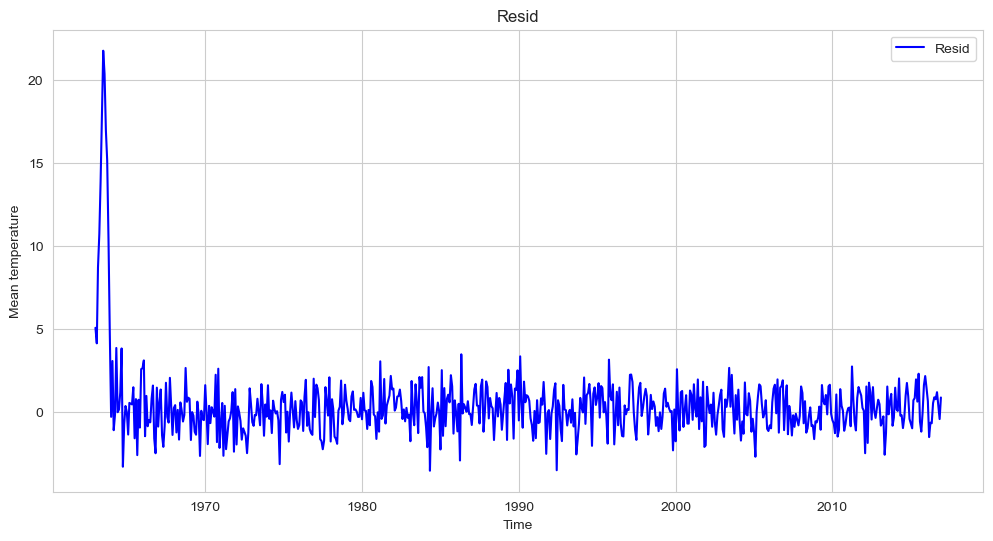

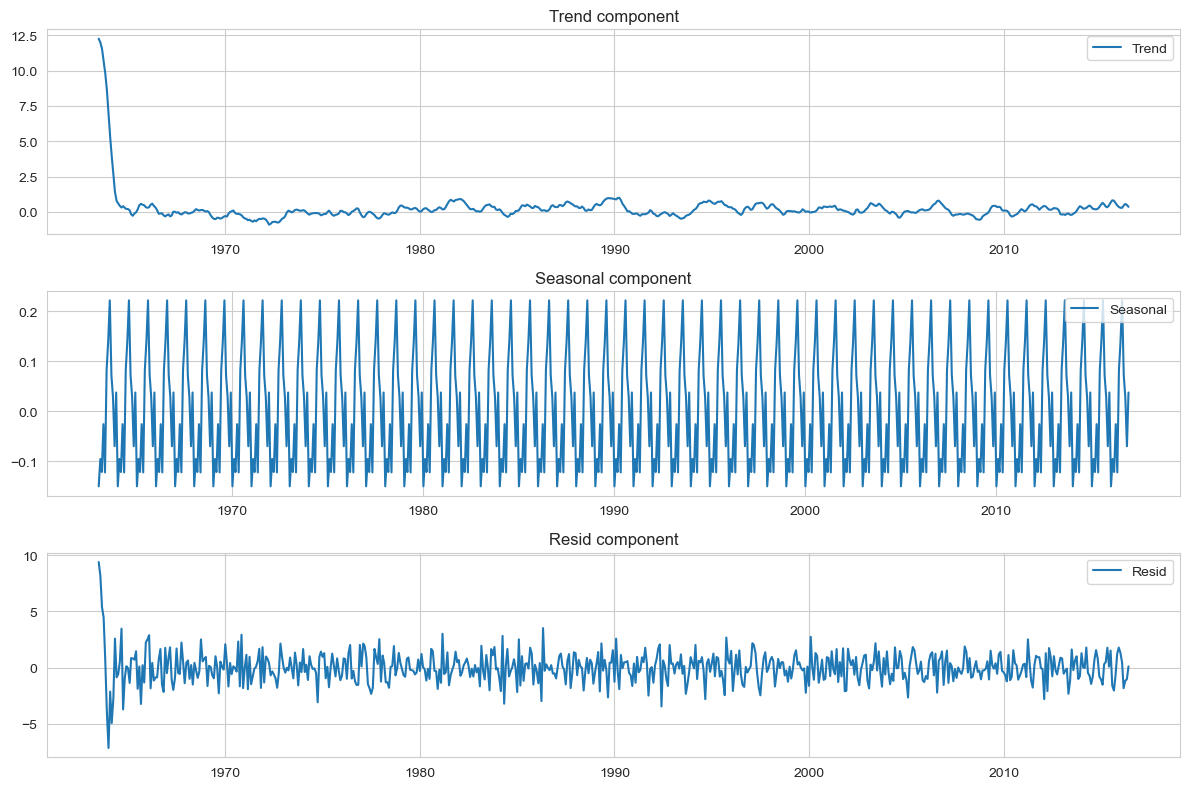

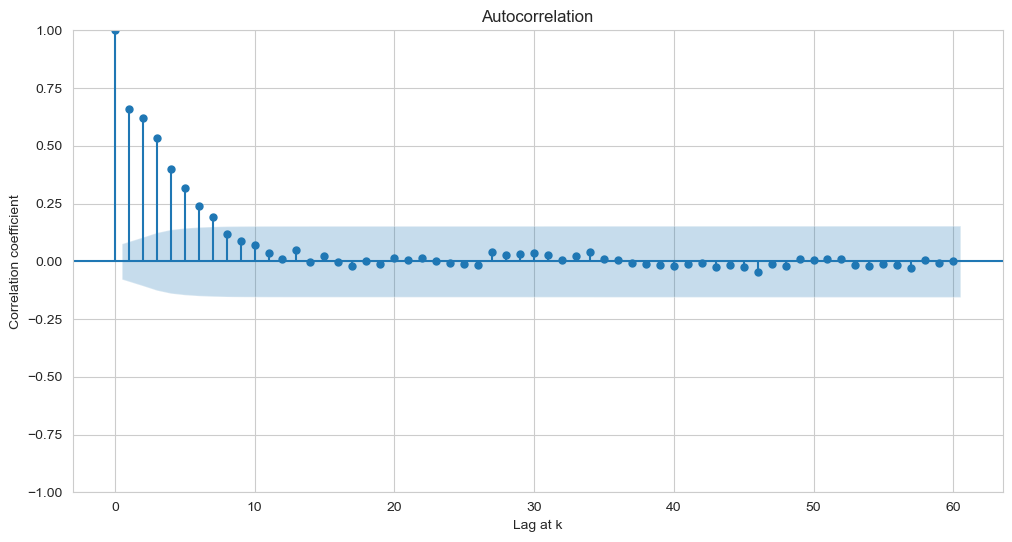

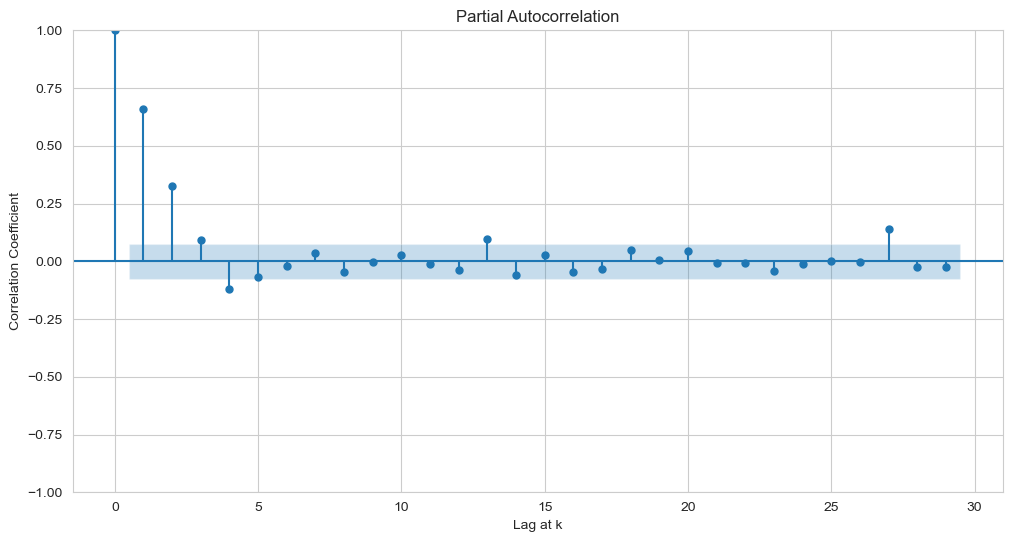

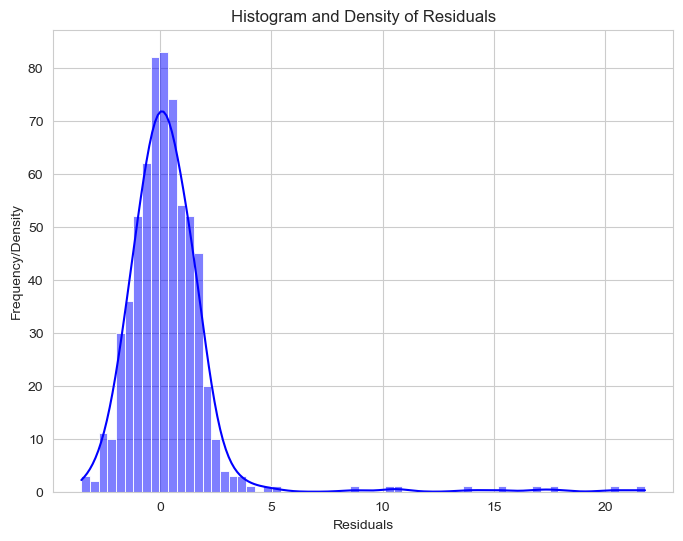

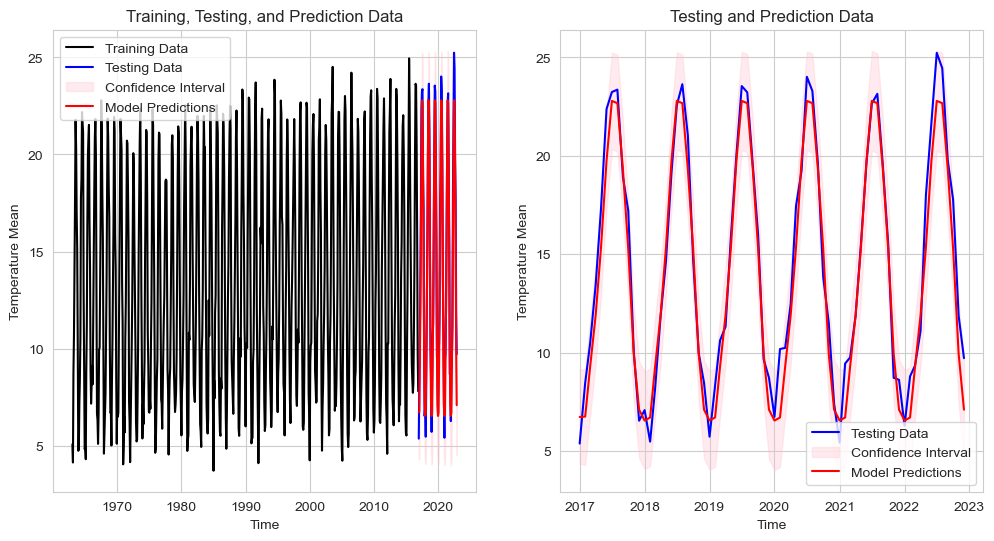

Model metrics:

    Model   MAE   MSE  RMSE  R**2    RAE     RSE
0  SARIMA  1.03  1.72  1.31  0.95  91.29  141.64


In [68]:
SARIMA_pred, metric_sarima = arima_models('SARIMA',X_train, X_test, model_order=(1, 0, 0), model_seasonal_order=(0, 1, 1, 12))

Models metrics are concated.

In [69]:
metrics = pd.concat([metric_arima, metric_sarima], axis=0)

In [70]:
metrics.head()

,Model,MAE,MSE,RMSE,R**2,RAE,RSE
0,ARIMA,5.59,43.89,6.62,-0.07,2230.31,2448.34
0,SARIMA,1.03,1.72,1.31,0.95,91.29,141.64


----
**Parcial conclusions.**


#### Histogram and Density
The histogram of residuals has a center around 0, a tail reaching -3, and another reaching 20. This can indicate overfiting.

#### Autocorrelation Function

The autocorrelation function (ACF) plot of the model's residuals exhibits significant values, it indicates the presence of serial correlation. This suggests that the residuals at a given time point are related to residuals at previous or subsequent time points. The significant peaks in the ACF plot imply that there are patterns or structures in the residuals not adequately captured by the model.

#### Analyzing the decomposition of residuals

Decomposing the residuals of the model reveals the presence of both trend and seasonality. This indicates that the model hasn't captured all the underlying patterns within the dataset.

#### Prediction
The constant and increasing discrepancy between predictions and observations may be due to the model's inability to fit both trend and seasonality in the data adequately. If the predicted graph is consistently below the actual graph, it suggests that the model did not correctly fit the trend. At the same time, the increase in the difference over time indicates problems capturing seasonality.


#### Model Metrics

To summarize, while the R^2 value is high, the asymmetry in residual density and the growing difference between predicted and observed values indicate that there is a possibility of improving the model. This can be achieved by either modifying the model specifications, exploring transformations in the data or trying out different modeling techniques.

<a name="item5.3"></a>
## 5.3. Sarimax model

<a name="item5.3.1"></a>
### 5.3.1. Including Exogenous Variables in the Train Set

In SARIMAX, the train and test set must include both the time series that is being modeled and predicted, as well as the exogenous variables. Exogenous variables can impact the time series, and including them in the model can help improve the accuracy of the predictions.

Exogenous Variables are: 

- Maximum Wind Speed
- Total Precipitation

In [72]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()


for i in ['Mean Temperature','Maximum Wind Speed','Total Precipitation']:
    
    X_train_exo, X_test_exo = Train_Test_data(monthly_spain[[i]], test_percentage = 0.09)
    X_train[i] = X_train_exo[i]
    X_test[i] = X_test_exo[i]

Training data: 656
            Mean Temperature
Time                        
2017-04-01         13.452000
2017-05-01         17.325484
2017-06-01         22.377667
2017-07-01         23.239355
2017-08-01         23.362903



Test data: 64
            Mean Temperature
Time                        
2017-09-01         18.935333
2017-10-01         17.210645
2017-11-01         10.061667
2017-12-01          6.535161
2018-01-01          7.075161
Training data: 656
            Maximum Wind Speed
Time                          
2017-04-01           16.262667
2017-05-01           15.760000
2017-06-01           16.168000
2017-07-01           16.332258
2017-08-01           15.706774



Test data: 64
            Maximum Wind Speed
Time                          
2017-09-01           14.619667
2017-10-01           13.182258
2017-11-01           14.003000
2017-12-01           17.159677
2018-01-01           16.597097
Training data: 656
            Total Precipitation
Time                           
2017-

In [73]:
X_train.head()

,Mean Temperature,Maximum Wind Speed,Total Precipitation
Time,,,
1963-01-01,5.083871,16.433548,5236.3
1963-02-01,4.147143,19.621071,5176.8
1963-03-01,8.724839,20.040323,3246.3
1963-04-01,10.742000,17.437667,3672.7
1963-05-01,13.911613,15.423548,2249.6


In [74]:
X_test.head()

,Mean Temperature,Maximum Wind Speed,Total Precipitation
Time,,,
2017-09-01,18.935333,14.619667,1061.0
2017-10-01,17.210645,13.182258,1383.3
2017-11-01,10.061667,14.003000,1961.7
2017-12-01,6.535161,17.159677,2997.5
2018-01-01,7.075161,16.597097,3404.1


<a name="item5.3.2"></a>
### 5.3.2. Select Model Parameters with Auto_ARIMA

In [75]:
# Using auto_arima to find the best SARIMAX model with exogenous variables

# Define the values for differencing (d and D)
d_values = [0, 1, 2]
D_values = [0, 1, 2]

# Set initial values and ranges for p, q, P, Q
startp = 0
startq = 0
maxp = 3
maxq = 3
startP = 0
startQ = 0
maxP = 3
maxQ = 3

# Set the seasonality parameters
m_value = 12  # Monthly seasonality
seasonal_value = True

# Set whether the series is stationary or not
stationary_value = False

# Enable exogenous variables
exog = True

# Select exogenous variables from X_train and X_test
exog_var_train = X_train[['Maximum Wind Speed', 'Total Precipitation']]
exog_var_test = X_test[['Maximum Wind Speed', 'Total Precipitation']]

# Find the best SARIMAX model with exogenous variables
SARIMAX_op = S_ARIMA_options(X_train['Mean Temperature'], d_values, D_values, startp, startq, maxp, maxq, startP, startQ, maxP, maxQ, m_value, seasonal_value, stationary_value, exog, exog_var_train)


 Alternative models with d: 0 and D: 0

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4181.936, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3220.817, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5374.866, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3570.847, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2189.290, Time=1.20 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=2529.790, Time=0.76 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2206.389, Time=2.95 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3046.515, Time=0.80 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=3367.702, Time=1.35 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=3.95 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2233.258, Time=0.94 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2176.367, Time=1.4

 ARIMA(3,1,0)(3,1,0)[12] intercept   : AIC=2307.649, Time=2.21 sec

Best model:  ARIMA(3,1,0)(3,1,0)[12]          
Total fit time: 41.375 seconds
 Alternative models with d: 1 and D: 2

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,2,0)[12]             : AIC=3426.970, Time=0.09 sec
 ARIMA(1,1,0)(1,2,0)[12]             : AIC=2935.328, Time=0.27 sec
 ARIMA(0,1,1)(0,2,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(1,1,0)(0,2,0)[12]             : AIC=3310.725, Time=0.16 sec
 ARIMA(1,1,0)(2,2,0)[12]             : AIC=2744.912, Time=0.59 sec
 ARIMA(1,1,0)(3,2,0)[12]             : AIC=2650.960, Time=1.53 sec
 ARIMA(1,1,0)(3,2,1)[12]             : AIC=inf, Time=11.09 sec
 ARIMA(1,1,0)(2,2,1)[12]             : AIC=inf, Time=4.76 sec
 ARIMA(0,1,0)(3,2,0)[12]             : AIC=2757.873, Time=1.09 sec
 ARIMA(2,1,0)(3,2,0)[12]             : AIC=2614.572, Time=1.75 sec
 ARIMA(2,1,0)(2,2,0)[12]             : AIC=2704.749, Time=0.74 sec
 ARIMA(2,1,0)(3,2,1)[12]             : AIC=inf, 

In [76]:
SARIMAX_op

,d,D,Order,Seasonal order,AIC
0,0,0,"(1, 0, 0)","(1, 0, 1, 12)",2174.592037
1,0,1,"(1, 0, 0)","(0, 1, 1, 12)",2100.057333
2,0,2,"(1, 0, 0)","(3, 2, 0, 12)",2449.843701
3,1,0,"(0, 1, 1)","(1, 0, 3, 12)",2246.924356
4,1,1,"(3, 1, 0)","(3, 1, 0, 12)",2305.648745
5,1,2,"(3, 1, 0)","(3, 2, 0, 12)",2599.734410
6,2,0,"(1, 2, 0)","(2, 0, 0, 12)",2927.977635
7,2,1,"(3, 2, 0)","(3, 1, 0, 12)",2595.389457
8,2,2,"(3, 2, 0)","(3, 2, 0, 12)",2887.643404


In [77]:
print("The best model is:")
print()
print(SARIMAX_op.sort_values(by='AIC', ascending=True).head(1))

The best model is:

   d  D      Order Seasonal order          AIC
1  0  1  (1, 0, 0)  (0, 1, 1, 12)  2100.057333


<a name="item5.3.3"></a>
### 5.3.3. SARIMAX Model Creation

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65464D+00    |proj g|=  1.05719D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     43      2     0     0   2.641D-01   1.655D+00
  F =   1.6546139549391581     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                      SARIMAX Results                                       
Dep. Variable:                     Mean Temperature   No. Observations:                  656
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood               -1085.427
Date:                              Tue, 23 Jan 2024   AIC                           2180.854
Time:                                      19:58:11

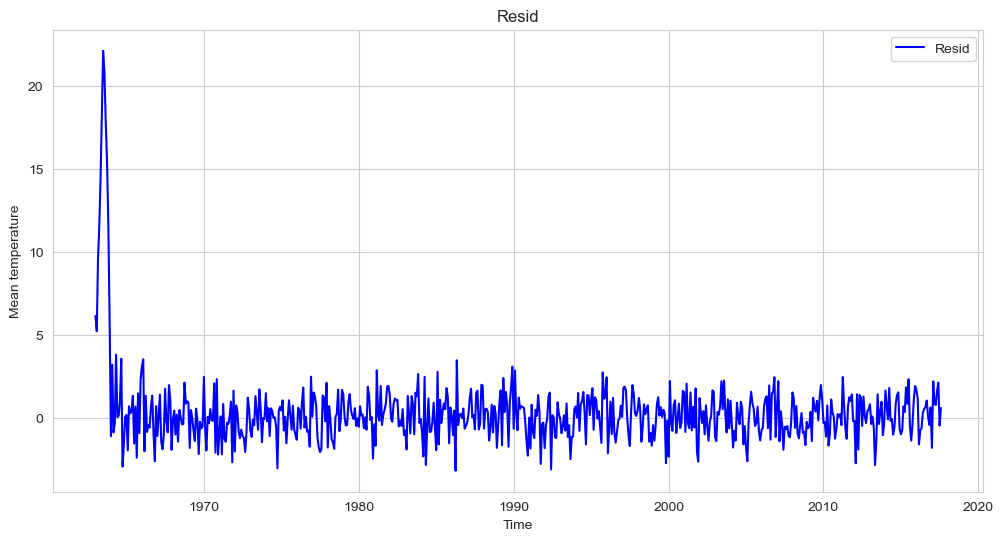

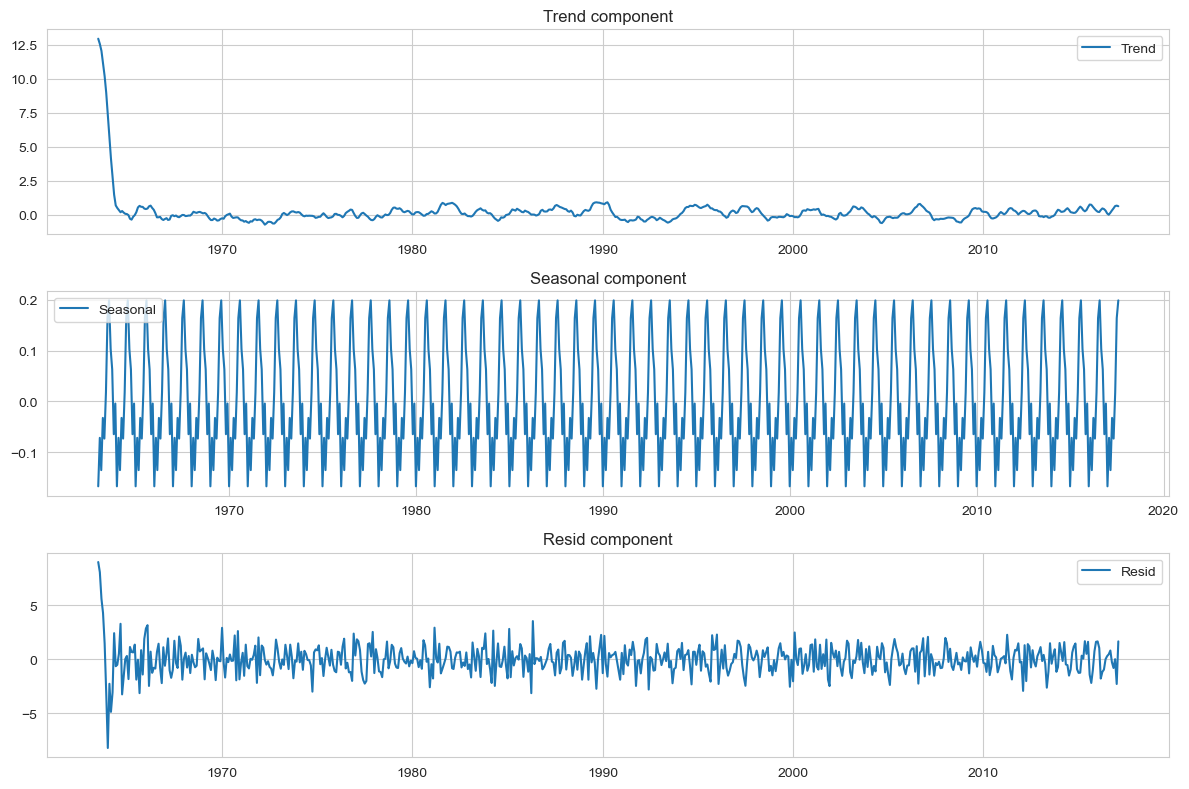

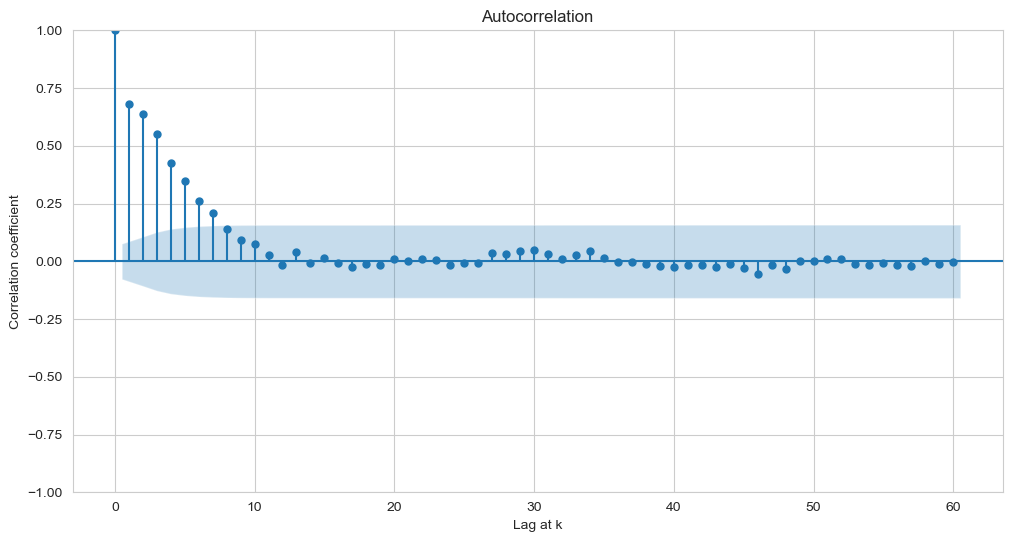

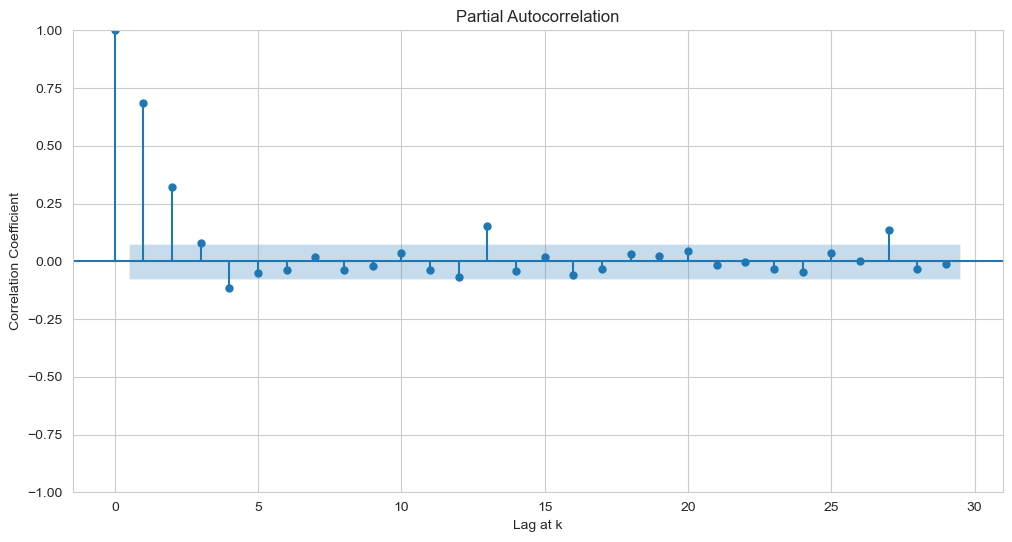

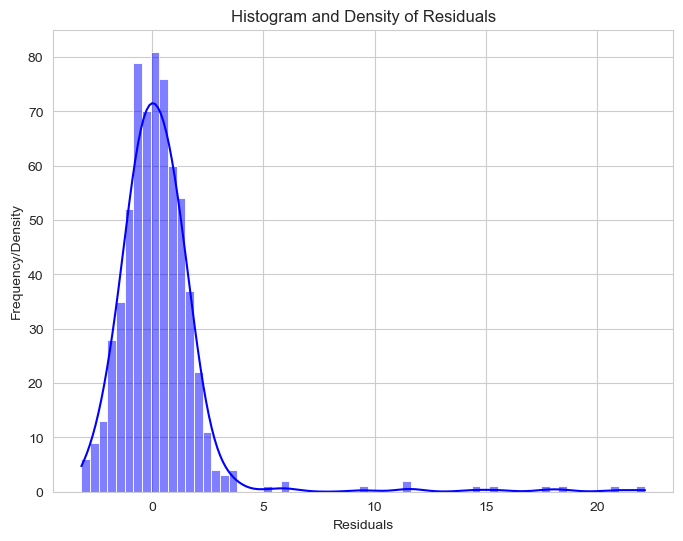

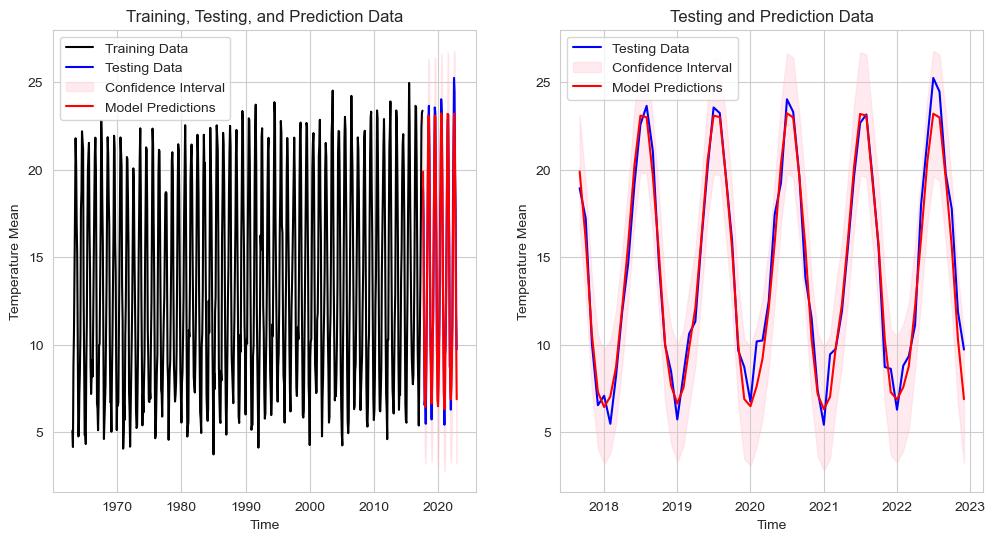

Model metrics:

     Model   MAE   MSE  RMSE  R**2    RAE     RSE
0  SARIMAX  0.89  1.22  1.11  0.97  81.75  127.81


In [78]:
SARIMA_pred,metric_sarimax = arima_models(
                                        'SARIMAX',
                                        X_train[['Mean Temperature']], 
                                        X_test[['Mean Temperature']], 
                                        model_order=(1, 0, 0), 
                                        model_seasonal_order=(0, 1, 1, 12), 
                                        exog_analysis=True, 
                                        exog_var_train=exog_var_train,
                                        exog_var_test=exog_var_test
                                    )



---
**Parcial conclusion.**

The residual analysis and predicted vs. actual results of the SARIMAX model indicate that the model does not capture the intrinsic pattern inherent in the dataset. Furthermore, there are signs of overfitting. This indicates the need for refinement or alternative modeling strategies to enhance predictive accuracy.

In this way, the exogenous variables don't contribute to improving the accuracy.

---

In [79]:
metrics = pd.concat([metrics, metric_sarimax], axis=0)

<a name="item5.4"></a>
## 5.4. Prophet model


In [80]:
def Prophet_model(df):
    """
    This function performs the following steps:
    - Splits the data into training and testing sets
    - Fits and predicts using the Prophet model
    - Analyzes the model residuals
    - Displays a summary of the forecast
    - Calculates model metrics
    
    Parameters:
    - df: DataFrame with time in the index and a single column representing the target variable
    
    Returns:
    - forecast: DataFrame containing the forecasted values
    """
    from prophet import Prophet
    
    # Add a 'ds' column to the DataFrame
    df['ds'] = df.index
    
    # Rename columns for compatibility
    df = df.rename(columns={df.columns[0]: "y"}).reset_index(drop=True)

    # Split the data into training and testing
    X_train, X_test = Train_Test_data(df, 0.1)
    
    # Initialize the Prophet model
    model = Prophet()
    
    # Train the model
    model.fit(X_train)
    
    # Use the trained model to make a forecast
    future = pd.DataFrame(X_test["ds"])
    forecast = model.predict(future)
    
    # Calculate residuals
    residuals = pd.merge(X_test, forecast[['ds', 'yhat']], on="ds", how="left")   
    residuals["residuals"] = residuals["y"] - residuals["yhat"]
    residuals.set_index('ds', inplace=True)
    
    # Analyze residuals
    analysis_residual(residuals['residuals'])
    
    # Display a summary of the forecast
    print('Summary of the forecast:')
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    
    # Plot the forecast
    fig = Graphic_predict(X_train, X_test, forecast)
    plt.show()

    # Evaluate model metrics
    metrics = Metrics(X_test["y"].tolist(), forecast["yhat"].tolist(), 'PROPHET')

    return forecast, metrics


In this case, we will use the data set with daily frequency to predict.

Training data: 19724
          y         ds
19719  7.01 2016-12-27
19720  7.06 2016-12-28
19721  6.57 2016-12-29
19722  5.52 2016-12-30
19723  4.75 2016-12-31



Test data: 2191
          y         ds
19724  3.81 2017-01-01
19725  4.85 2017-01-02
19726  6.42 2017-01-03
19727  7.32 2017-01-04
19728  6.61 2017-01-05


19:58:15 - cmdstanpy - INFO - Chain [1] start processing
19:58:18 - cmdstanpy - INFO - Chain [1] done processing


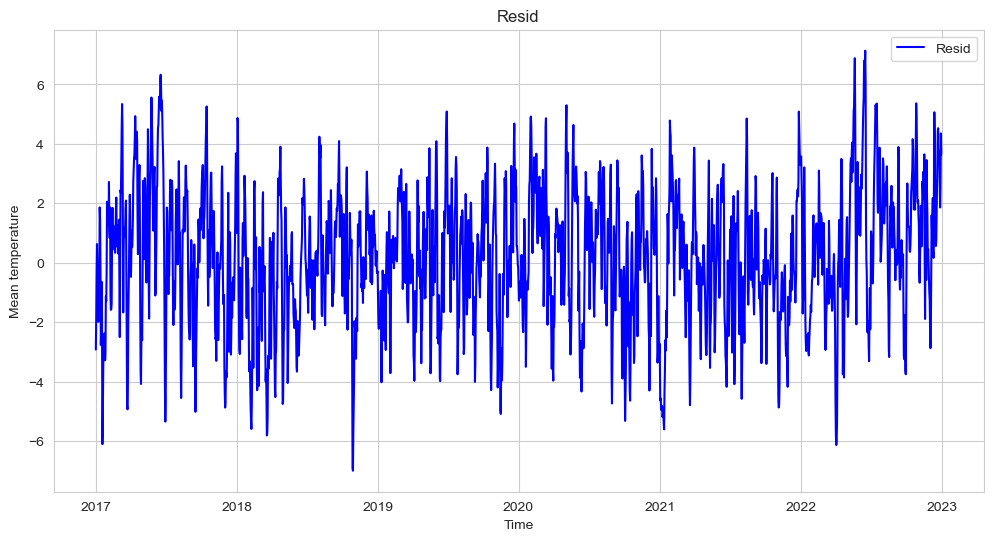

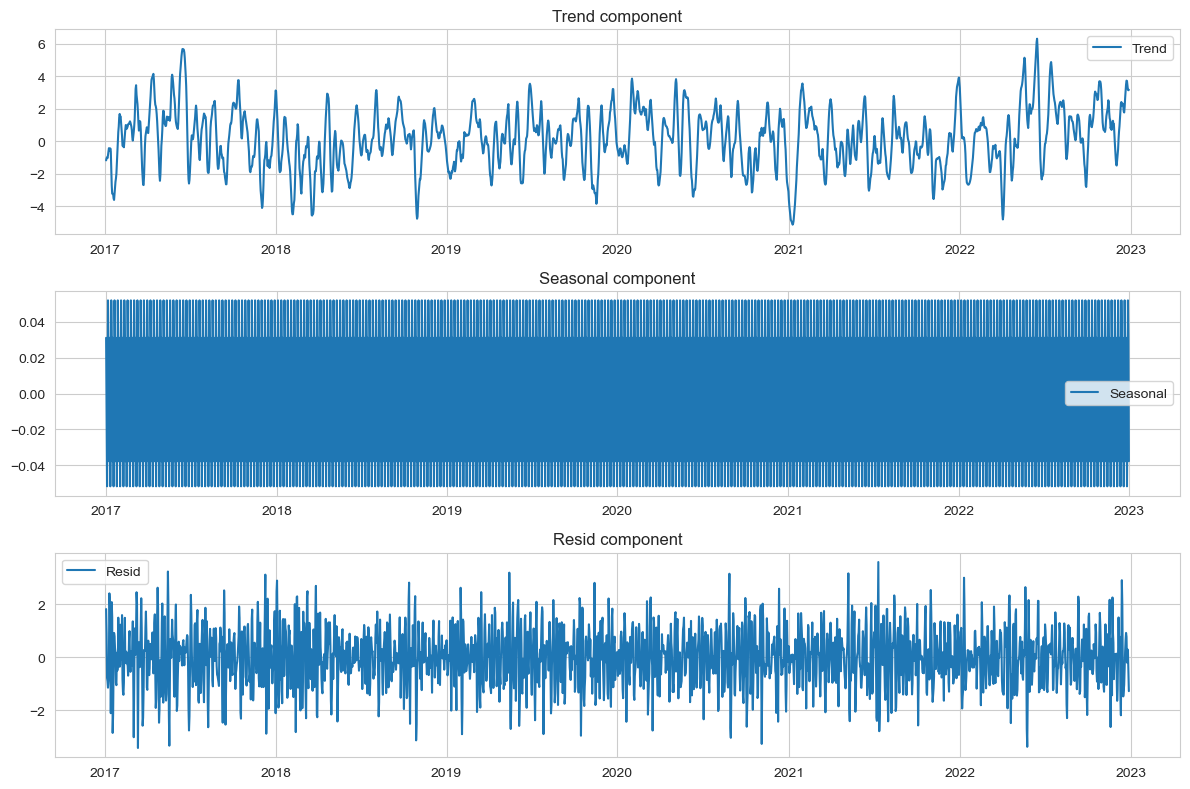

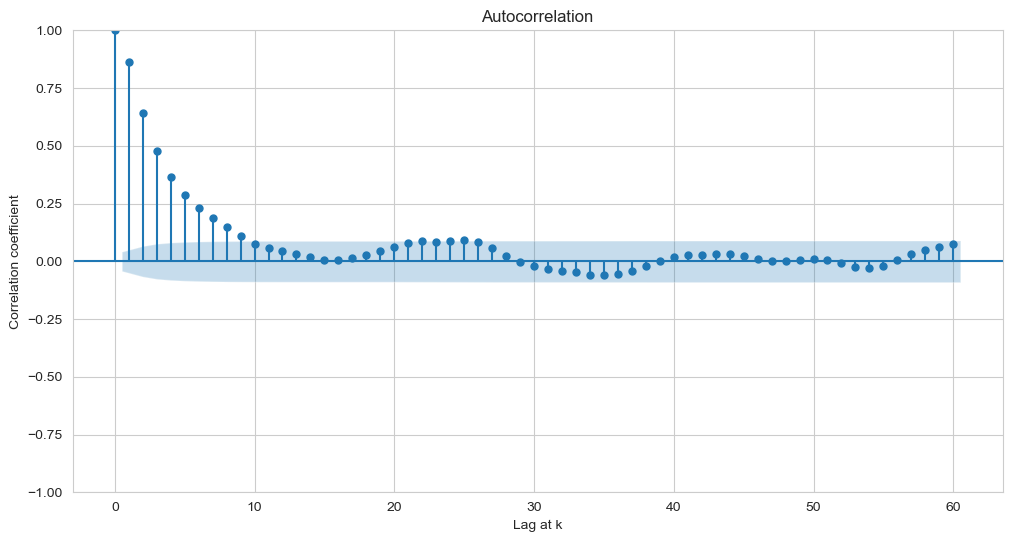

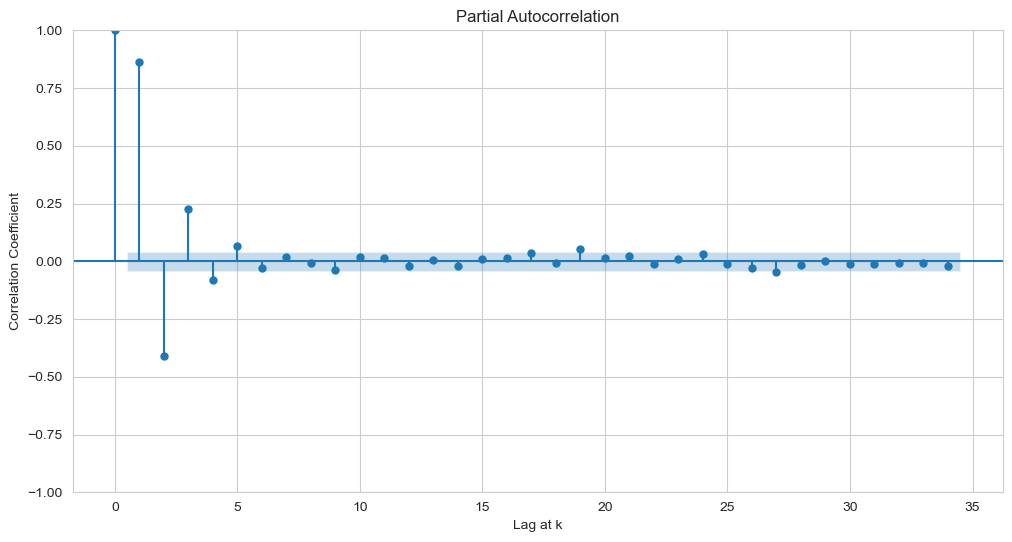

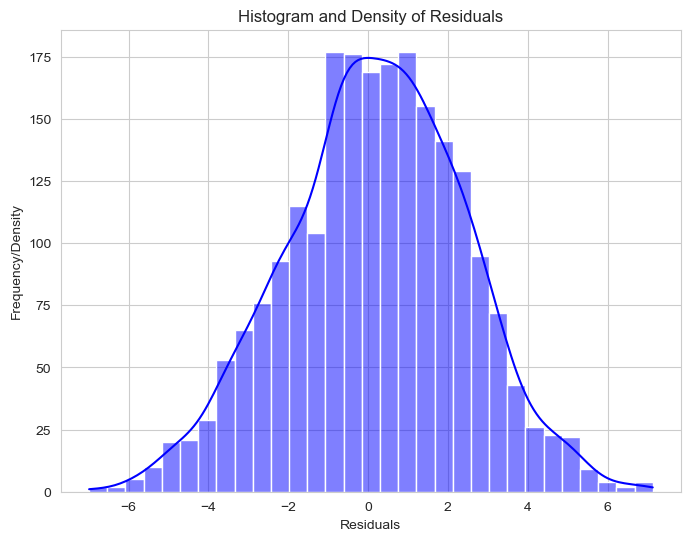

Summary of the forecast:
          ds      yhat  yhat_lower  yhat_upper
0 2017-01-01  6.726276    3.785256    9.465694
1 2017-01-02  6.711030    3.765289    9.543622
2 2017-01-03  6.684506    3.730065    9.409143
3 2017-01-04  6.688112    3.775862    9.542324
4 2017-01-05  6.691964    3.968815    9.590763


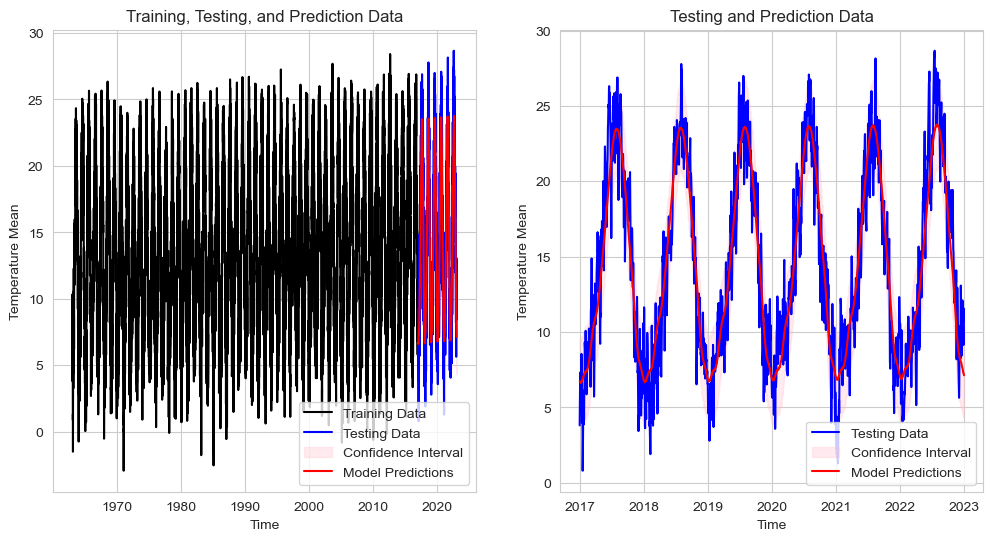

     Model   MAE   MSE  RMSE  R**2   RAE   RSE
0  PROPHET  1.79  5.01  2.24  0.88  0.32  0.12


In [81]:
df_prophet, metric_prophet = Prophet_model(data_spain[['Mean Temperature']])

In [82]:
metrics = pd.concat([metrics, metric_prophet], axis=0)

In [83]:
metrics

,Model,MAE,MSE,RMSE,R**2,RAE,RSE
0,ARIMA,5.59,43.89,6.62,-0.07,2230.31,2448.34
0,SARIMA,1.03,1.72,1.31,0.95,91.29,141.64
0,SARIMAX,0.89,1.22,1.11,0.97,81.75,127.81
0,PROPHET,1.79,5.01,2.24,0.88,0.32,0.12


---
**Parcial conclusion.**

It is evident that the model fails to capture all the patterns, and the R2 metric is lower compared to the Arima models.

---

<a name="item6"></a>
# 6. Conclusion

The ARIMA model performs the poorest as it does not consider the seasonality inherent in the data. On the other hand, SARIMA, which incorporates stationarity, significantly improves precision by capturing data patterns better. When exogenous variables are introduced in the SARIMAX model, there is an increase in the R2 metric. While both SARIMA and SARIMAX models can capture data patterns, model residuals may indicate signs of overfitting. The simpler Prophet model captures the data pattern but achieves lower precision compared to SARIMA and SARIMAX.

One important observation is that none of the models captures the increasing trend in temperature over the years.